# Описание проекта

 Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

 Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

 В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

# 1. Открыть файл с данными и изучить общую информацию

**Задание 1. Импортирование необходимых библиотек. Считывание данные из csv-файла в датафрейм и сохранение в переменную `df`.**



In [111]:
import pandas as pd  # Импортируем библиотеку pandas
import matplotlib.pyplot as plt # Импортирую библиотеку визуализации
import seaborn as sns # Импортирую библиотеку визуализации
import numpy as np # Импортируем библиотеку numpy
from scipy import stats as st # Импортируем библиотеку scipy
!pip install missingno # Импортируем библиотеку для визуализации пропусков
import missingno as mi
import warnings
warnings.simplefilter('ignore') # избавимся от навязчивых сообщений об ошибках

In [112]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')  # прочитаем csv-файл

# 2. Подготовка данных


**Задание 2. Замените названия столбцов (приведите к нижнему регистру)**


In [113]:
df.columns = df.columns.str.lower()
df.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Задание 4. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему**

Посмотрим тип данных в столбцах


In [115]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

*Из таблицы видно, что тип данных в столбцax `year_of_release` и `user_score` отражен некорректно:*
* тип данных в столбце `year_of_release` указан `float64` - неверно, заменим его на - `int64`, так как нелогично оставлять тип столбца в формате с плавающей точкой
* тип данных в столбце `user_score` указан `object` - неверно, заменим его на - `float64`, так как число не должно быть строкой


Перед изменением типов данны столбцов обратим внимание на оценку "tbd" в столбце `user_score`, так как из-за него мы не сможем изменить тип данных со строчного на числовой

In [116]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Немного поискав информацию о `tbd` в интернете на профильных чатах, я нашел расшифровку 'To Be Determined' - это говорит о том, что игра ещё не анонсирована, и рейтинг будет определен позже, поэтому заменю данную аббревиатуру на -1. Это будет значение-индикатор, что игры, в которых будет рейтинг -1 ещё не анонсированы. Предварительно проверю нет ли случайно такого значания в столбце.

In [117]:
df.query('user_score == "-1"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Значений таких как -1 нет, заменяю "tbd" на -1

In [118]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', '-1')

In [119]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype(float)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Задание 5. Обраработайте пропуски при необходимости**

Выведем количество пропущенных значений для каждого столбца.

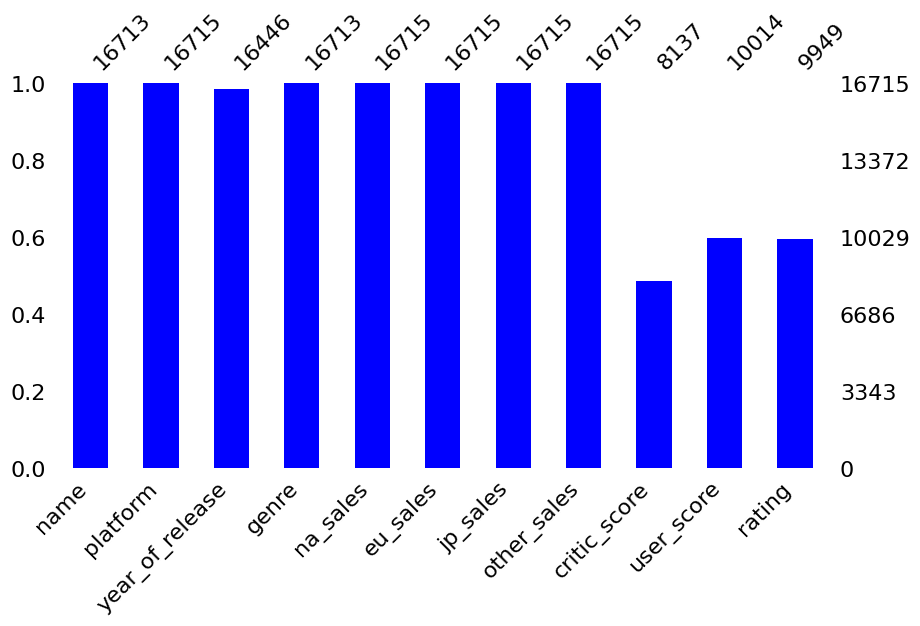

In [120]:
mi.bar(df, figsize = (10,5), color = 'blue') # Визуализируем пропущенные значения
plt.show()

Удалим строки с пропущенными значениями в столбцах name и genre, так как они не сыграют для общей картины исследования никакой роли

In [121]:
df = df.dropna(subset = ['name', 'genre'])

Удалим строки с пропущенными значениями в столбце `year_of_release` - это составит 1,6% от общих данных, что является не существенным

In [122]:
df.dropna(subset=['year_of_release'], inplace=True)
df = df.reset_index(drop=True)

Не буду удалять строки с пропущенными значениями в столбцах: `critic_score`, `user_score`, `rating`, так как их очень много и удаление такого большого количесва данных может привести к искаженному результату исследования. Оставлю строки с пропусками без изменения, так как заполнять эти пропуски медианными значаниями сгруппировав по какому либо столбцу считаю не верным решением, так как нет четкой прослеживаемой связи данных столбцов с другими столбцами.

Еще раз убедимся, что у нас остались только пропуски в столбцах: critic_score, user_score, rating

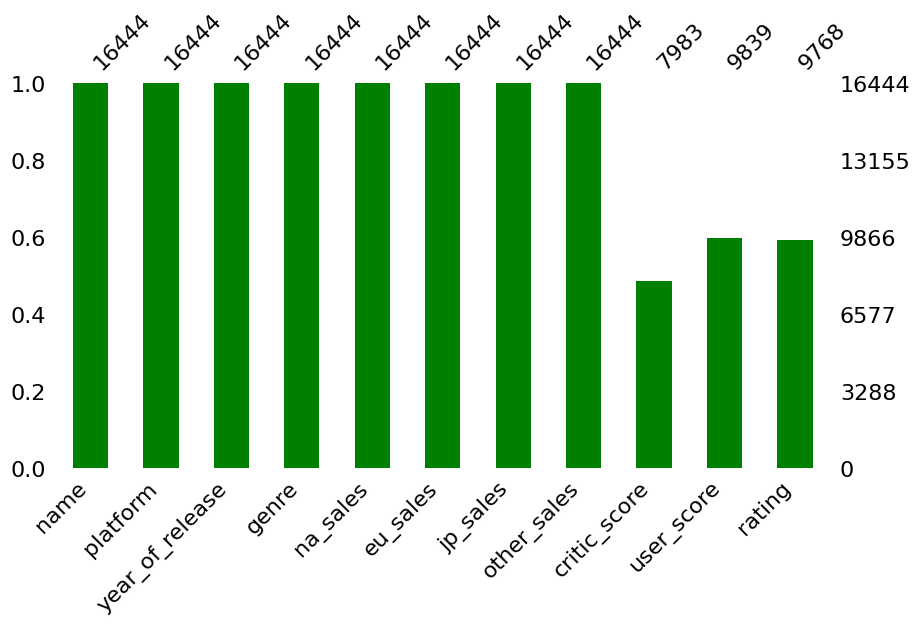

In [123]:
mi.bar(df, figsize = (10,5), color = 'green') # Визуализируем пропущенные значения
plt.show()

Проверим датафрейм на наличие явных дубликатов

In [124]:
df.duplicated().sum()

0

Явных дубликатов нет

Обратимся к методу describe() для того, чтобы оценить какие в нашем датафрейме возможны аномальные значения или выбросы, которые могут повлиять на результаты исследования

In [125]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.0,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,9839.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,5.163919
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,3.715200
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.000000,-1.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,60.000000,2.400000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.0,0.240000,0.110000,0.040000,0.030000,79.000000,8.000000
max,2016.0,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Явных аномалий и выбросов я не наблюдаю

**Общий вывод по подготовке данных**

Отлично. Я привел названия столбцов к нижнему регистру, обработал и визуализировал пропуски в датафрейме, проверил наличие явных дубликатов. Большое количество пропусков в столбцах: `critic_score`, `user_score`, `rating` скорее всего связано непопулярностью данных видеоигр у пользователей, что привело к нежеланию у пользователей проставлять рейтинг для данных игр, поэтому удаление такого большого количества данных может привести к искаженному результату исследования. Оставим пропуски без изменения. В столбце `user_score` заменю значения `tbd` на -1, это будет индикатором того, что игры ещё не анонсированы. Явных аномалий и выбросов я не нашел.

**Задание 6. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [126]:
df['total_sales_all_reg'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_all_reg
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Добавил отдельный столбец по суммарным продажам во всех регионах

# 3. Исследовательский анализ данных

**Задание 7. Посмотреть сколько игр выпускалось в разные годы.**

Посмотрим, важны ли данные за все периоды.

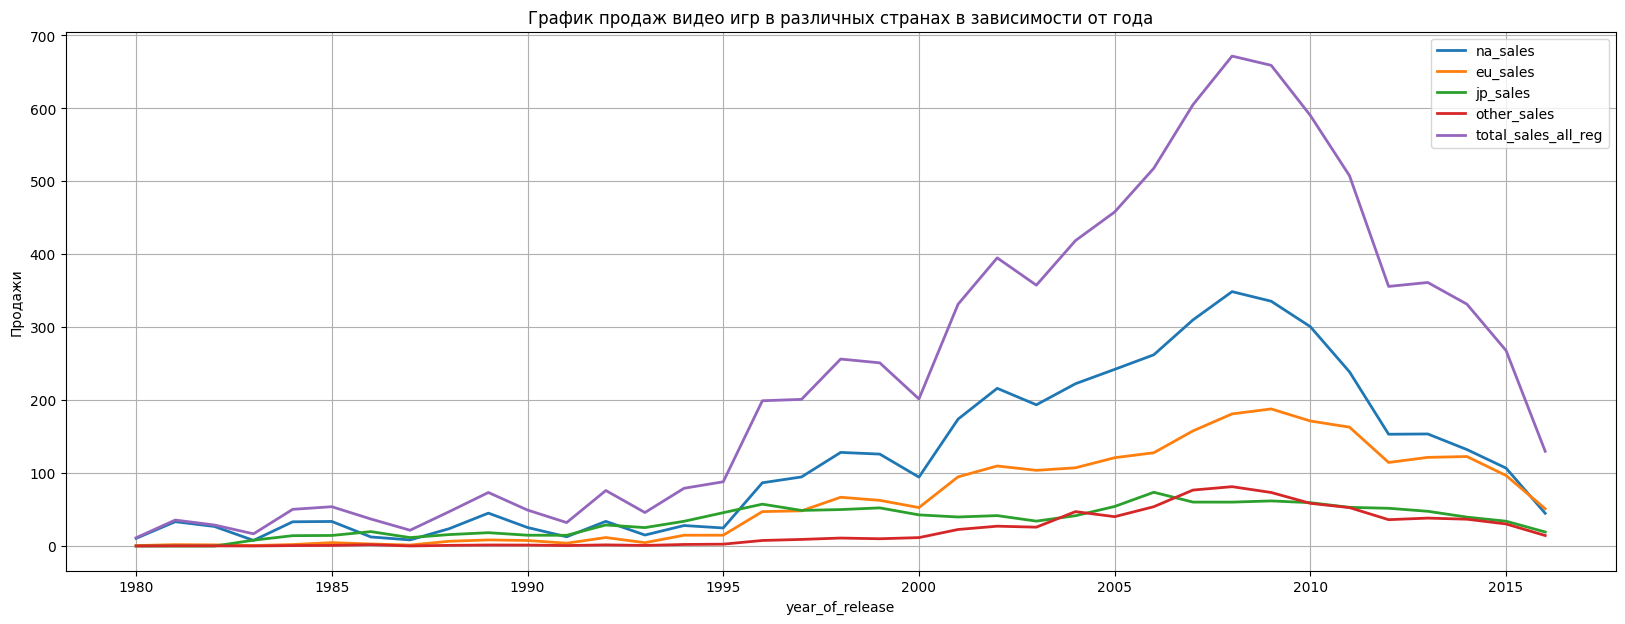

In [127]:
# Построим график продаж видео игр в различных странах в зависимости от года.
# Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам
country_df = df[[x for x in df.columns if 'sales' in x] + ['year_of_release']]
country_df.groupby('year_of_release').sum().plot(figsize=(20,7), grid = True, linewidth = 2.0, \
  title = 'График продаж видео игр в различных странах в зависимости от года')
plt.xlabel('year_of_release')
plt.ylabel('Продажи')
plt.show()

Как мы заметили из приведенных данных, что резкий рост продаж видеоигр во всем мире начался с 2000 года, тогда он достиг отметки 100 млн. копий видеоигр на самом активном рынке мира - в странах Северной Америки. Пик продаж приходился на 2008 год и составил 350 млн. копий видеоигр также на рынке Северной Америки, около 200 млн. копий в Европе, в остальных регионах приближался к отметке 100 млн. копий видеоигр. Во всем мире было продано порядка 670 млн. копий видеоигр. Далее идет спад вплоть до 2016 года, предполагаю, что спад связан с первой волной мирового кризиса 2008 года. В период с 2012 по 2014 год в Северной Амарике и Европе наблюдается небольшой рост продаж видеоигр, но кризис 2014 года заставляет снизить обороты продаж видеоигр к 2000 годам. На основании имеющихся данных на рынке продаж видеоигр страны Северной Америки лидировали всегда, на втором месте страны Европы, ну а за третье и четвёртое места велась борьба у Японии со всеми остальными странами мира. Таким образом в нашем исследовании нас интересует только период с 2000 года, так как до 2000 года популярность видеоигр только зарождалась во всем мире.

**Задание 8. Посмотреть изменение продаж по платформам.**


Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы.

In [128]:
top_6 = df.groupby('platform')['total_sales_all_reg'].sum().to_frame().sort_values(by = 'total_sales_all_reg', ascending = False)
top_6.head(30)

,total_sales_all_reg
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Так как по таблице сразу видна существенная разница между шестой и седьмой строчкой мировых продаж, а именно между Play Station и Play Station 4. Можно сделать вывод, что у нас определился топ-6 наиболее популярных игровых платформ. Но давайте визуализируем получившуюся таблицу, чтобы лишний раз убедиться в нашей правоте.

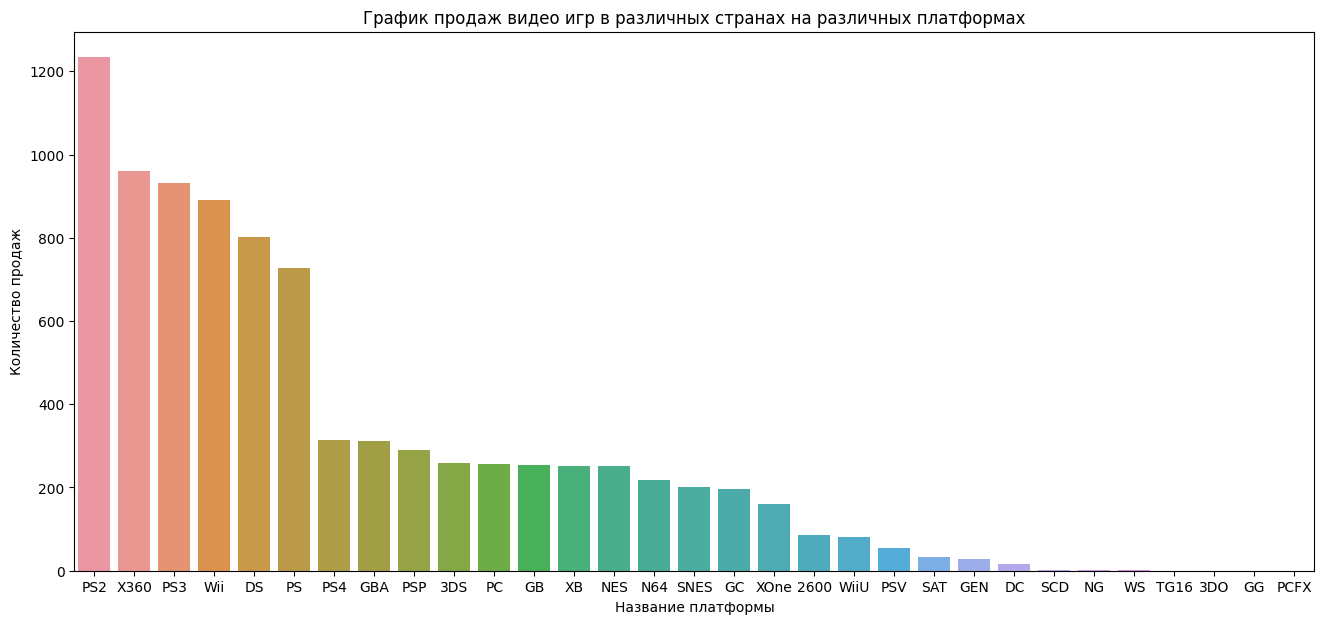

In [129]:
platform_df = df.pivot_table(
    index='platform', values='total_sales_all_reg', aggfunc='sum').sort_values(by='total_sales_all_reg', ascending=False)
plt.figure(figsize=(16,7))
sns.barplot(x=platform_df.index,y=platform_df['total_sales_all_reg'])
plt.title("График продаж видео игр в различных странах на различных платформах")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

Всё верно, намечается существенная разница мировых продаж видеоигр между шестой и седьмой строчкой, а именно между платформами Play Station и Play Station 4. Вот и определился top_6 мировых платформ по продажам видеоигр.

Построим распределение по годам по топ-6 мировых платформ для видеоигр

In [130]:
top_best_platf = list(top_6.index[:6])
top_best_platf

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Платформа PS2


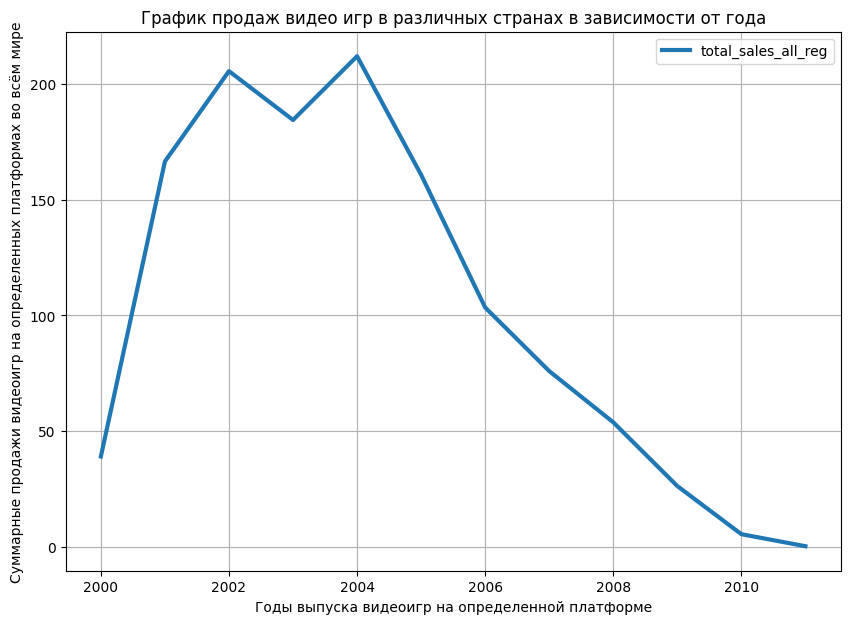

Платформа X360


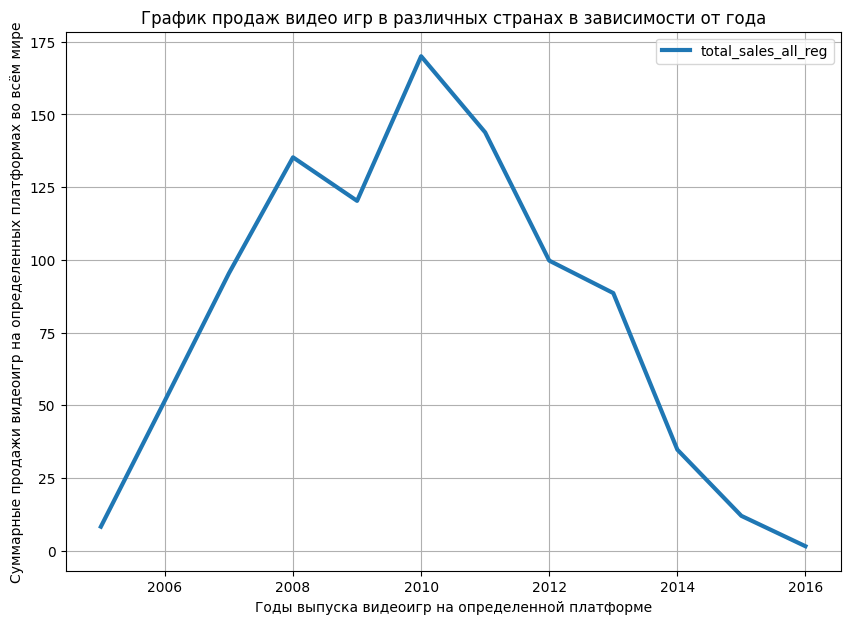

Платформа PS3


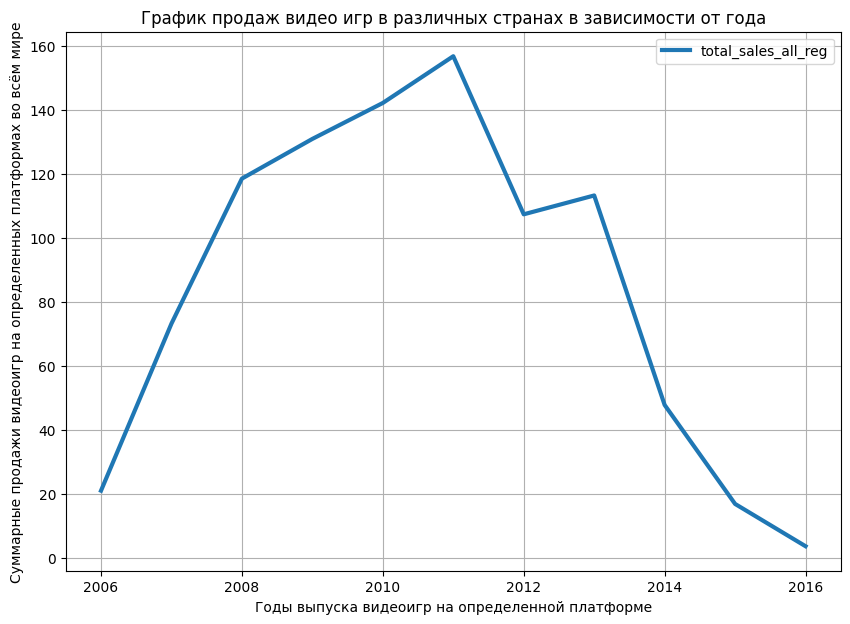

Платформа Wii


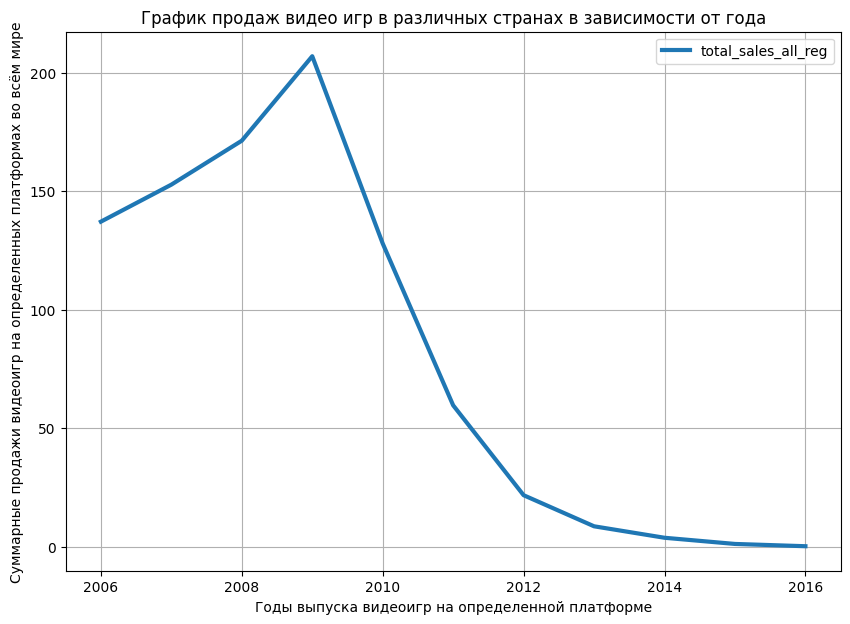

Платформа DS


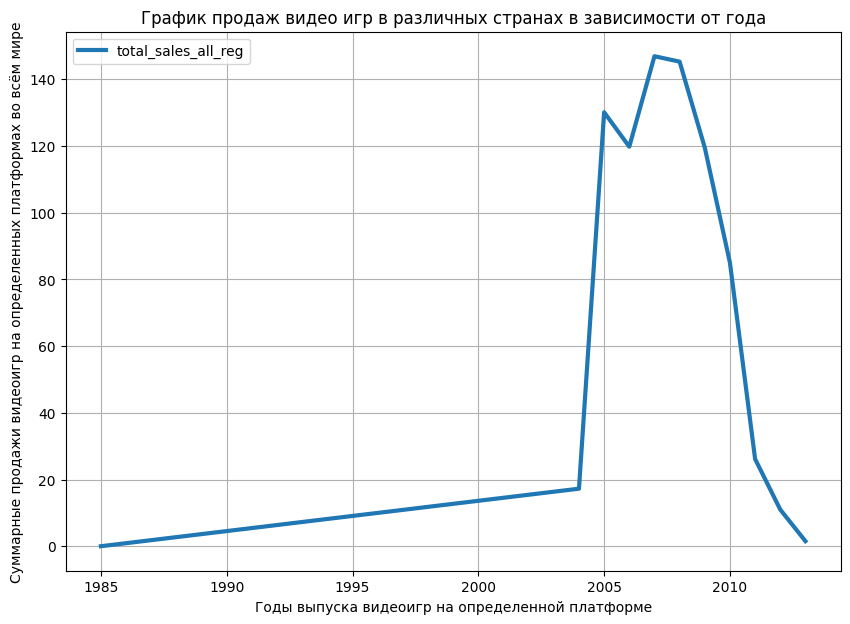

Платформа PS


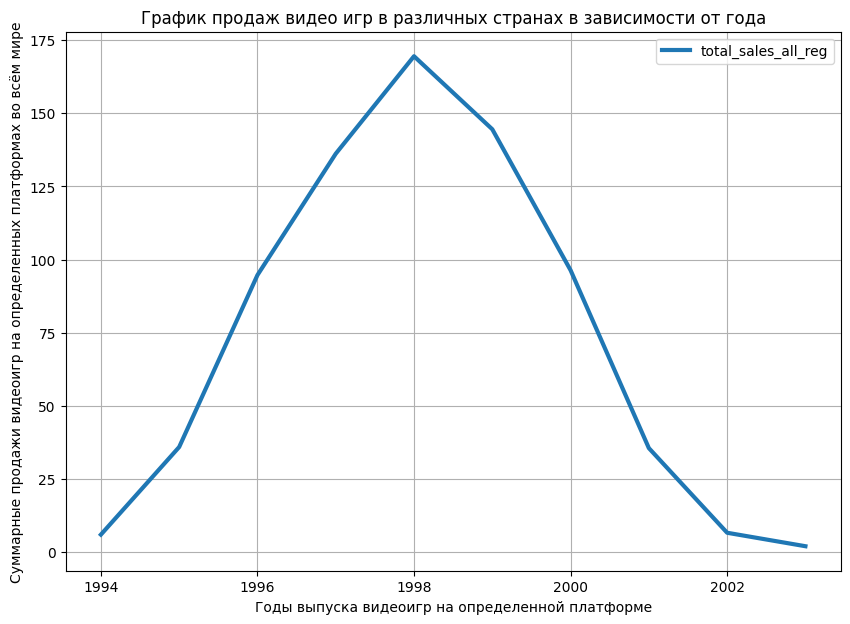

In [131]:
for platform in top_best_platf:
    print('Платформа', platform)
    top_6 = pd.pivot_table(df.query('platform == @platform'), index=['year_of_release'], values='total_sales_all_reg', aggfunc='sum') \
    .plot(figsize=(10,7), grid = True, linewidth = 3.0, title = 'График продаж видео игр в различных странах в зависимости от года')
    plt.xlabel('Годы выпуска видеоигр на определенной платформе')
    plt.ylabel('Суммарные продажи видеоигр на определенных платформах во всём мире')
    plt.legend()
    plt.show()


На основании приведеденных графиков по топу 6 лучших платформ для видеоигр мы видим, что характерный срок появления новых и исчезновения старых платформы составляет примерно 10 лет. При этом чаще всего пик популярности приходится на середину срока существования платформы. Также мы наблюдаем такую картину, что игры вупущенные на таких платформах как Play Station, Play Station 2 и Nintendo DS уже неактуальны, тоесть данные игровые платформы уже не выпускают. Так как их пики популярности канули в лету, поэтому использовать данные по этим платформам не корректно для прогноза будующих годов.

**Задание 9. Возьмем данные за соответствующий актуальный период.**

Так как цель нашего проекта заключается в том, чтобы сделать прогноз на 2017 год, то будем руководствоваться следующими данными: так как средний срок существования игровой платформы составляет 10 лет и пик продаж приходиться на середину срока существования платформы, то логично использовать для прогноза популярности видеоигр сроки существования игровых платформ. Так как нас интересует прогноз на 2017 год, то возьмем платформы, год выпуска которых начинается с 2012 года. И добавим условие, что суммарные продажи видеоигр на этих платформах составляют более 5 млн. копий, то есть эти платформы еще не "умерли"

In [132]:
# Найдем самые "молодые" игровые платформы
young_platforms = df.loc[(df['year_of_release'] >= 2012) & ( df['total_sales_all_reg'] >= 5)]
young_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_all_reg
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


**Задание 10. Посмотрим, какие платформы лидирую по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ**

In [133]:
# Посмотрим на список самых "молодых" игровых платформ
top_young_platf = young_platforms['platform'].unique()
top_young_platf

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC'],
      dtype=object)

Построим по списку "топ молодых платформ" графики

Платформа PS3


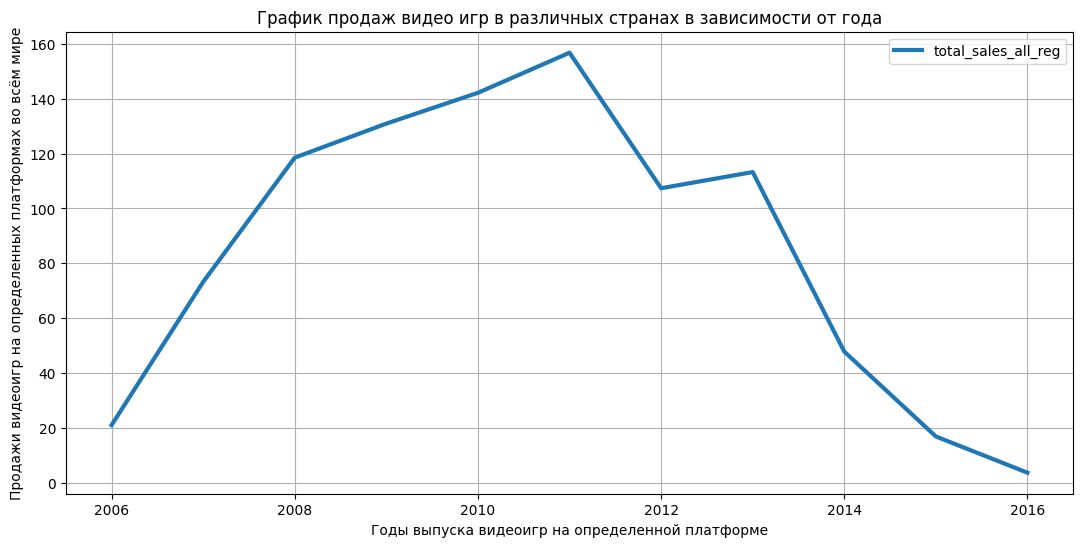

Платформа X360


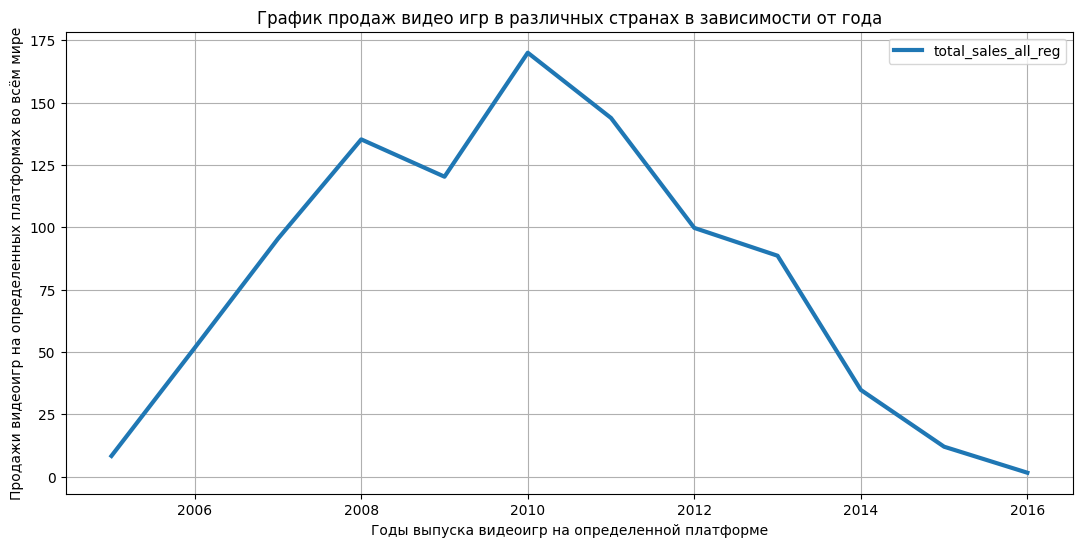

Платформа PS4


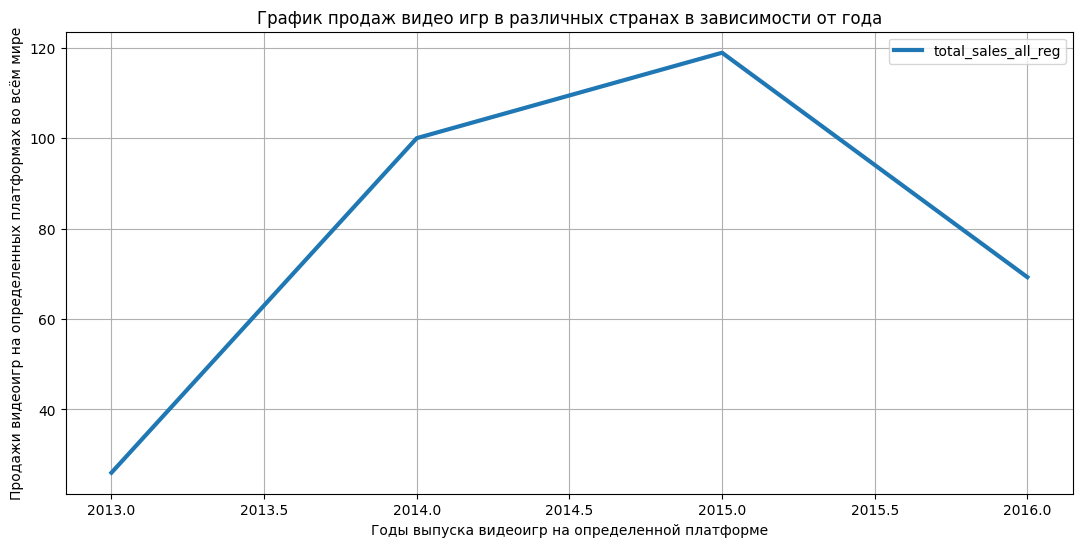

Платформа 3DS


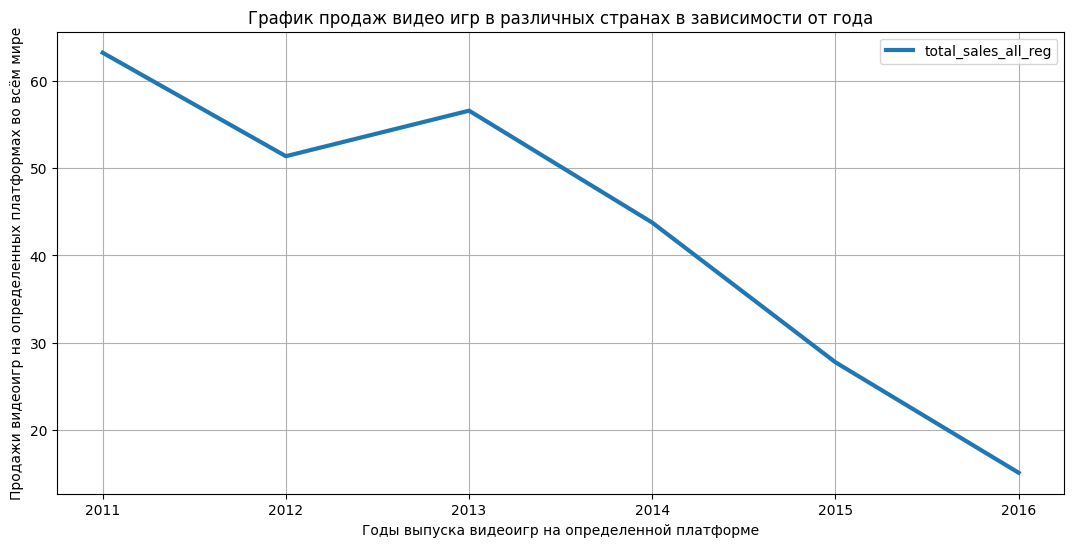

Платформа DS


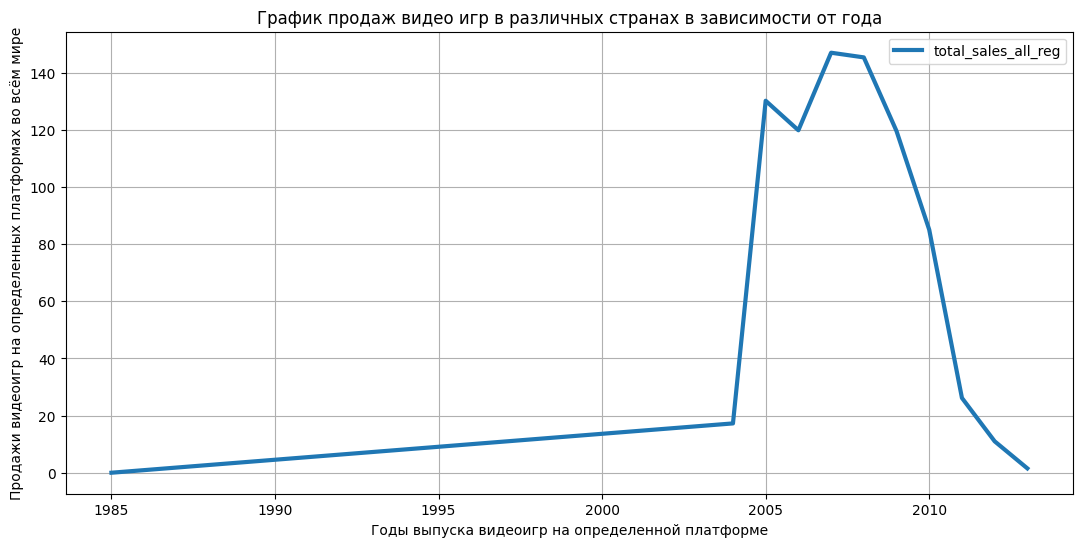

Платформа XOne


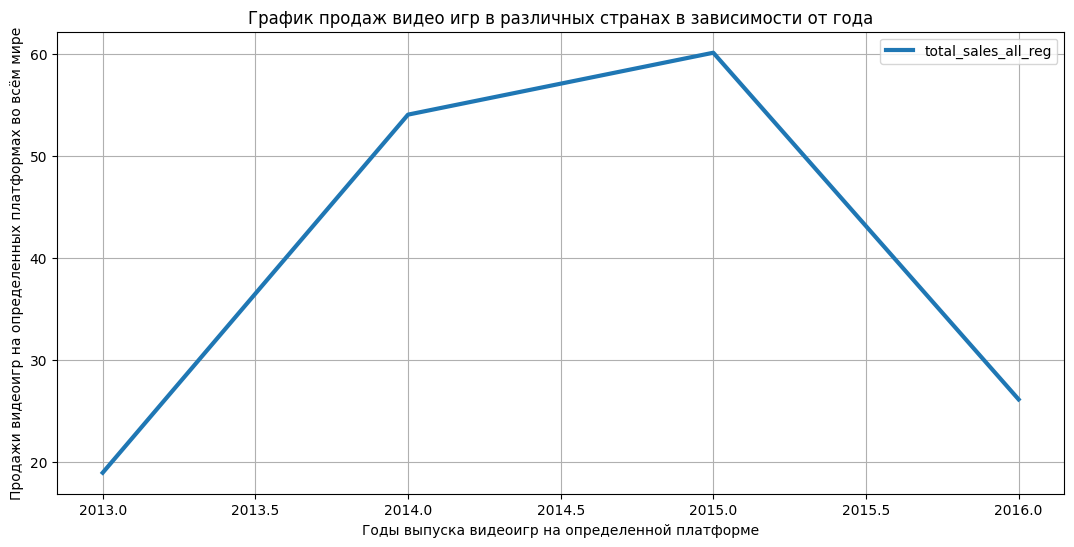

Платформа WiiU


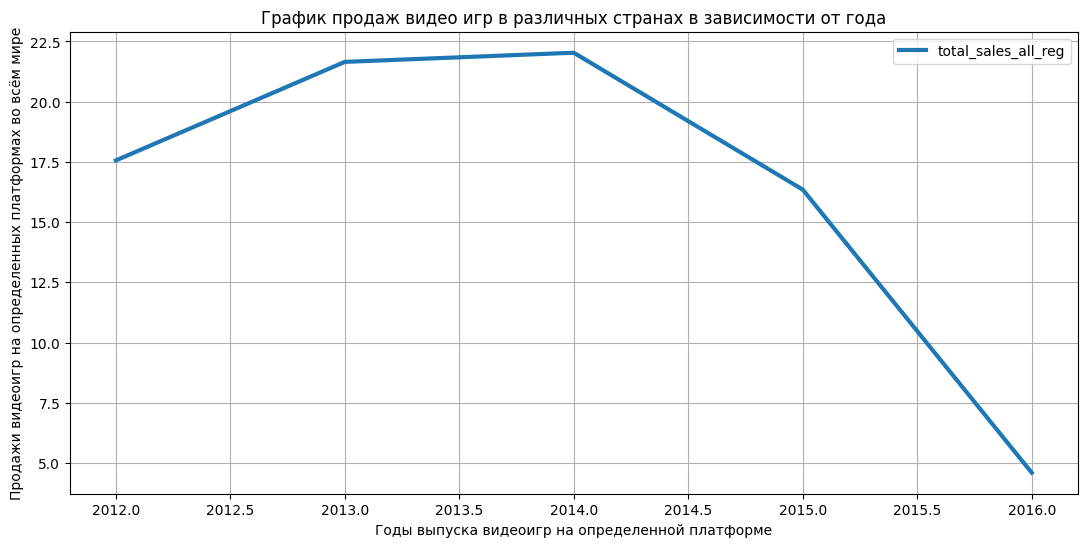

Платформа Wii


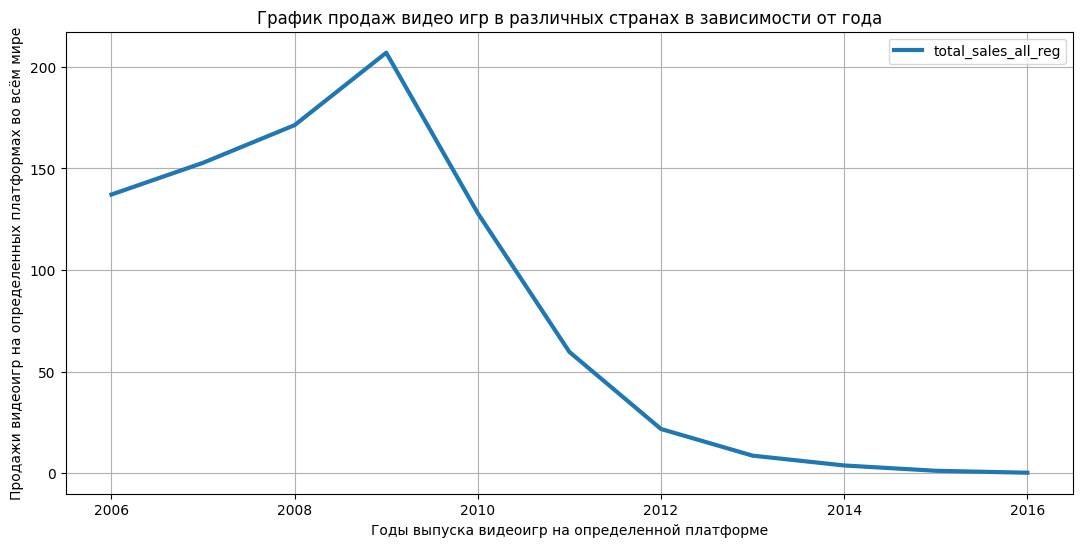

Платформа PC


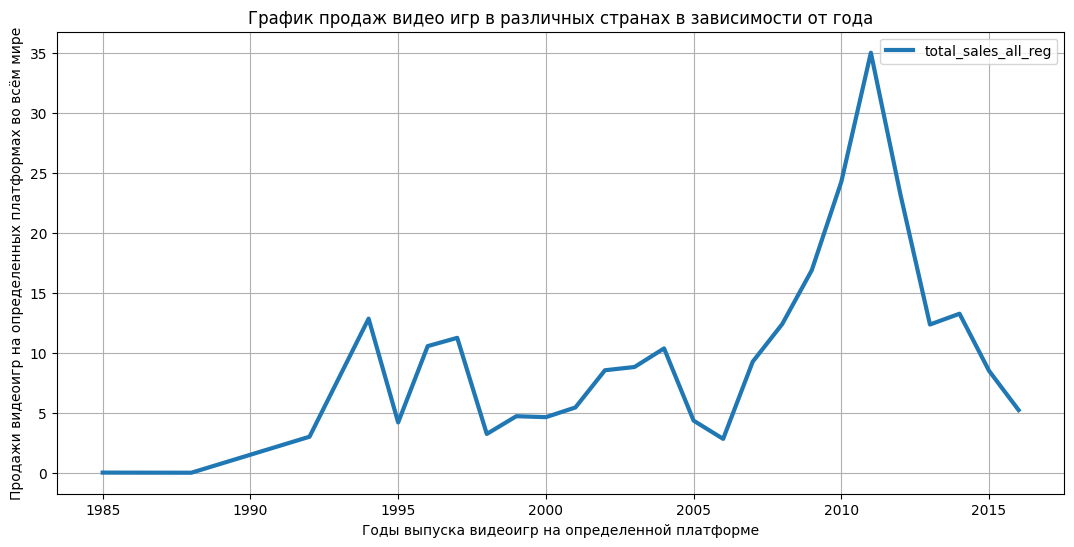

In [134]:
for platform in top_young_platf:
    print('Платформа', platform)
    young_platforms = pd.pivot_table(df.query('platform == @platform'), index=['year_of_release'], values='total_sales_all_reg', aggfunc='sum') \
    .plot(figsize=(13,6), grid = True, linewidth=3.0, title = 'График продаж видео игр в различных странах в зависимости от года')
    plt.xlabel('Годы выпуска видеоигр на определенной платформе')
    plt.ylabel('Продажи видеоигр на определенных платформах во всём мире')
    plt.legend()
    plt.show()

*Итак, подведем итог по построенным графикам:*
* Такие игровые платформы как Play Station 3, Xbox 360, Nintendo DS, WiiU, Wii практически близки к забвению;
* Play station 4 является мировым лидером продаж видеоигр с результатом 70 млн. копий, следом идёт Xbox One - 27 млн. копий и почетное третье место занимает портативная игровая консоль Nintendo 3DS с результатом 8 млн. копий;
* График выпуска видеоигр для персональных компьютеров больше похож на кардиограмму сердца больного, но тем неменее данная платформа жива и всеже держиться на "плаву"

*Определились несколько потенциально прибыльных платформ: Play Station 4, Xbox One, Nintendo 3DS и PC*

**Задание 11. Построим график "ящик с усами" по глобальным продажам игр в разбивке по перспективным платформам. Опишем результат.**

In [135]:
promising_gaming_platf = list['PS4', '3DS', 'XOne',  'PC'] # список перспективных платформ
top_promising_platf = df[df['platform'].isin(['PS4', '3DS', 'XOne', 'PC'])]

 Построим график "ящик с усами" по глобальным продажам игр в разбивке по перспективным платформам

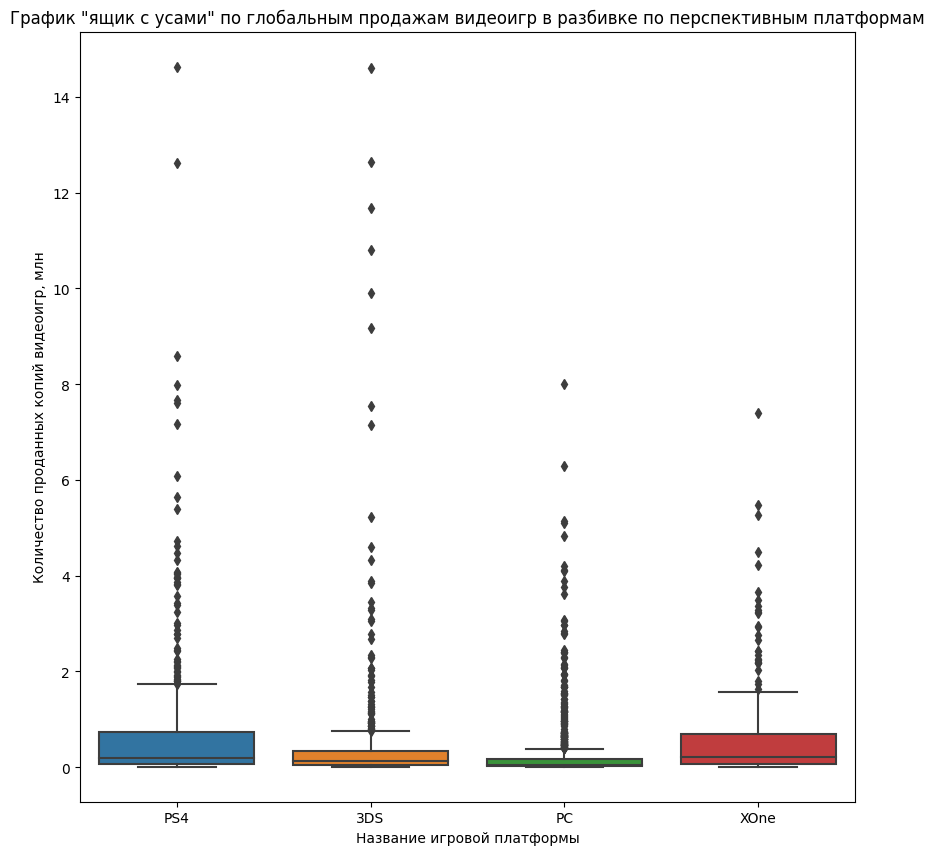

In [136]:
plt.figure(figsize=(10,10))
sns.boxplot(data = top_promising_platf, x = 'platform', y = 'total_sales_all_reg')
plt.xlabel('Название игровой платформы')
plt.ylabel('Количество проданных копий видеоигр, млн')
plt.title('График "ящик с усами" по глобальным продажам видеоигр в разбивке по перспективным платформам')
plt.show()

Картина стала яснее, количество проданных копий видеоигр располагается в диапазоне от 0 до 2 млн. копий. Посмотрим поближе:

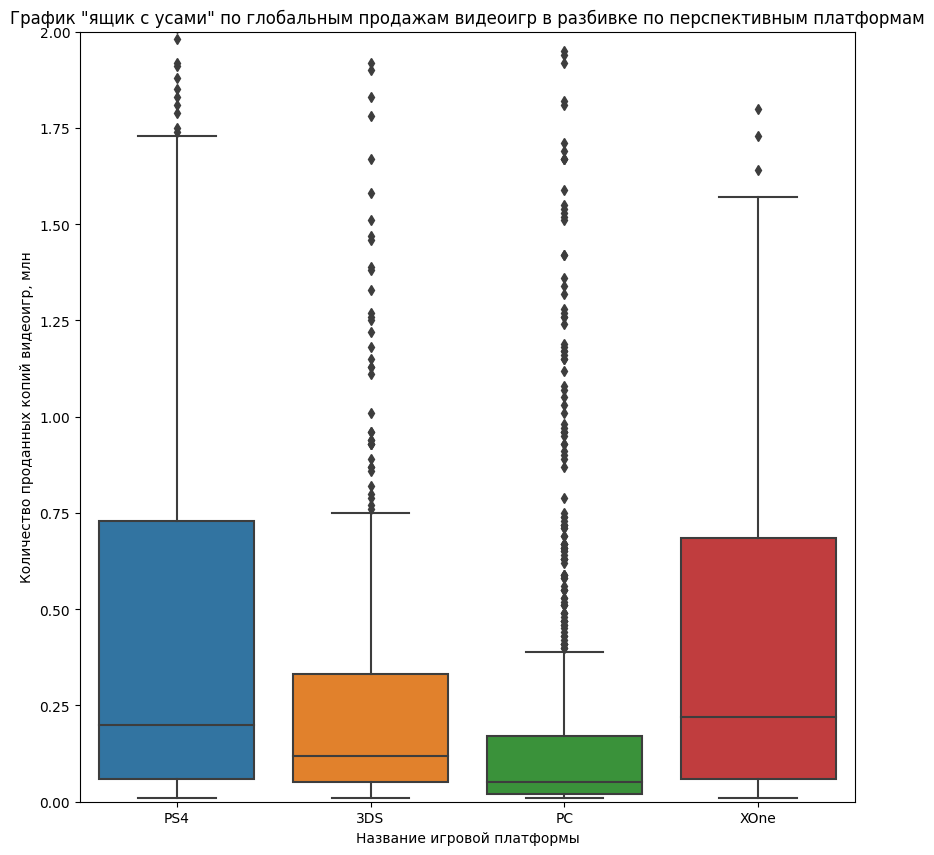

In [137]:
plt.figure(figsize=(10,10))
sns.boxplot(data = top_promising_platf, x = 'platform', y = 'total_sales_all_reg')
plt.xlabel('Название игровой платформы')
plt.ylabel('Количество проданных копий видеоигр, млн')
plt.title('График "ящик с усами" по глобальным продажам видеоигр в разбивке по перспективным платформам')
plt.ylim(0, 2)
plt.show()

In [138]:
top_promising_platf \
.pivot_table(index='platform', values='total_sales_all_reg', aggfunc=['sum', 'mean', 'median', 'std']) \
.sort_values(('median', 'total_sales_all_reg'), ascending=False)

,sum,mean,median,std
,total_sales_all_reg,total_sales_all_reg,total_sales_all_reg,total_sales_all_reg
platform,,,,
XOne,159.32,0.645020,0.22,1.036139
PS4,314.14,0.801378,0.20,1.609456
3DS,257.81,0.503535,0.12,1.441271
PC,255.76,0.267252,0.05,0.679745


Из приведённых данных можно сделать следующие выводы:
* По суммарным мировым продажам c большим отрывом лидирует платформа PS4 - 314,14 млн. копий, на втором месте 3DS - 257,81 млн. копий, на третьем месте с небольшим отрывом расположились персональные компьютеры - 255,76 млн. копий и на 4 месте XOne - 159,32 млн. копий.
* Медиана располагается у всех по разному, лишь у PS4 и XOne различие небольшое 0,02. Этот параметр говорит о том, что медианные продажи значительно ниже 1 млн. копий, но большое количество выбросов говорит, что существует большое количество проданных видеокопий превышающих 1 млн. копий для таких платформ как PC и 3DS. А для таких платформ как PS4 существуют выбросы превышающие 1,75 млн. копий, для XOne - ревышающие 1,6 млн. копий. Видимо это какие-то суперпопулярные видеоигры
* Самый большой "размах" у PS4 и XOne - это говорит о большей нестабильности данных платформ, в тоже время самой стобильной из игровых платформ являются персональные компьетеры - у них самый меньший размах, следом по стабильности идет 3DS.

**Задание 12. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**  

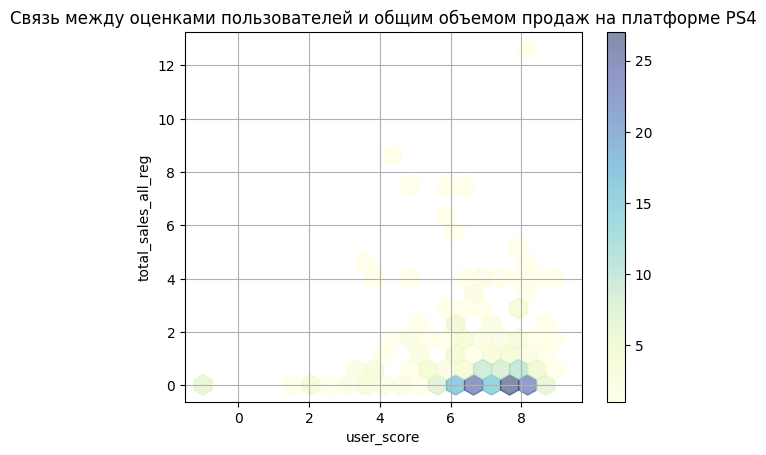

In [139]:
# Выберу самую популярную платформы в исследовании - PS4
# Посмотрим как влияют оценки пользователей на мировые продажи видеоигр на примере платформы PS4
df.query("platform == 'PS4'").plot(x='user_score', y='total_sales_all_reg', kind='hexbin', gridsize=20, sharex=False, grid=True, cmap='YlGnBu', mincnt=1, alpha=0.5,\
                                   title='Связь между оценками пользователей и общим объемом продаж на платформе PS4')
plt.show()

Обратили внимание на странное значение меньше нуля, это наше значение "-1" вместо "tbd"

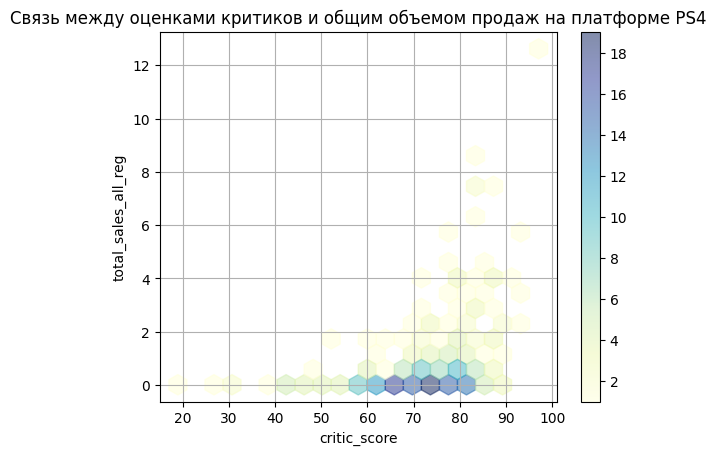

In [140]:
# Посмотрим как влияют оценки критиков на мировые продажи видеоигр на примере платформы PS4
df.query("platform == 'PS4'").plot(x='critic_score', y='total_sales_all_reg', kind='hexbin', gridsize=20, sharex=False, grid=True, cmap='YlGnBu', mincnt=1, alpha=0.5,\
                                   title='Связь между оценками критиков и общим объемом продаж на платформе PS4')
plt.show()

In [141]:
# Построим матрицу корреляции по интресующим нас параметрам для установления зависимостей между ними
df[['critic_score', 'user_score', 'total_sales_all_reg']].corr()

,critic_score,user_score,total_sales_all_reg
critic_score,1.000000,0.442269,0.245349
user_score,0.442269,1.000000,0.163845
total_sales_all_reg,0.245349,0.163845,1.000000


На основании приведенных данных можно сделать вывод, что существует определенная не существенная зависимость между оценками критиков, оценками пользователей и мировыми продажами видеоигр:
* Так коэффициент корреляции 0.163845 говорит о том, что существует слабая зависимость между оценками пользователей и мировыми продажами видеоигр;
* Коэффициент корреляции 0.245349 говорит о том, что также существует слабая зависимость между оценками критиков и мировыми продажами видеоигр, но эта зависимость немного выше, чем зависимость между оценками пользователей и мировыми продажами видеоигр
* При прогнозировании продаж видеоигр лучше всего полагаться на ценку критиков, нежели оценку пользователей

**Задание 13. Соотнесем выводы с продажами игр на других платформах.**

In [142]:
# Посчитаем коэффициент корреляции между оценкой критиков, оценкой пользователей и продажами на других платформах
for i in ['3DS', 'XOne', 'PC']:
  df_option = df.query('platform == @i')
  print('Платформа', i)
  print(f'Корреляция между оценкой критиков и продажами: {df_option.critic_score.corr(df_option.total_sales_all_reg):.4}')
  print(f'Корреляция между оценкой пользователей и продажами: {df_option.user_score.corr(df_option.total_sales_all_reg):.4}')
  print()

Платформа 3DS
Корреляция между оценкой критиков и продажами: 0.3487
Корреляция между оценкой пользователей и продажами: 0.2519

Платформа XOne
Корреляция между оценкой критиков и продажами: 0.417
Корреляция между оценкой пользователей и продажами: 0.08526

Платформа PC
Корреляция между оценкой критиков и продажами: 0.2574
Корреляция между оценкой пользователей и продажами: 0.06496



Данные по игровым платформам, а именно: 3DS, XOne, PC лишний раз подтверждают общую тенденцию, что в прогнозе продаж на 2017 год лучше учитывать оценки критиков, а не пользователей игровых платформ.

**Задание 14. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [143]:
# Сгруппируем данные жанров всех видеоигр по суммарным мировым продажам во всех регионах
top_games_by_genre = df.groupby('genre')['total_sales_all_reg'].sum().to_frame().sort_values(by = 'total_sales_all_reg', ascending = False)
top_games_by_genre.head(12)

,total_sales_all_reg
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


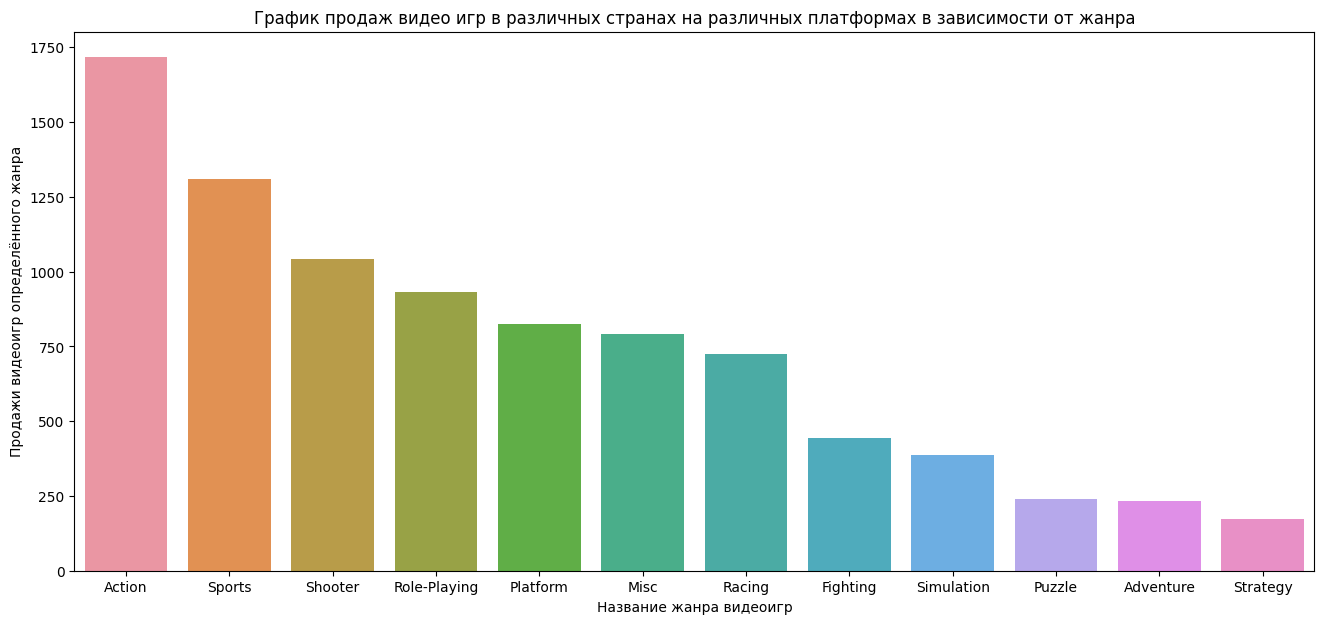

In [144]:
plt.figure(figsize=(16,7))
sns.barplot(x = top_games_by_genre.index, y = top_games_by_genre['total_sales_all_reg'])
plt.title("График продаж видео игр в различных странах на различных платформах в зависимости от жанра")
plt.xlabel("Название жанра видеоигр")
plt.ylabel("Продажи видеоигр определённого жанра")
plt.show()

 Построим график "ящик с усами" по глобальным продажам игр в разбивке по жанрам видеоигр, так как "ящик с усами" лучше отражаеткартину, отбрасывая выбросы и резко отличающиеся значения, которые могут исказить общую картину.

In [145]:
gaming_genre = df[df['genre'].isin(['Action', 'Sports', 'Shooter',  'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', \
                                    'Puzzle', 'Adventure', 'Strategy'])]

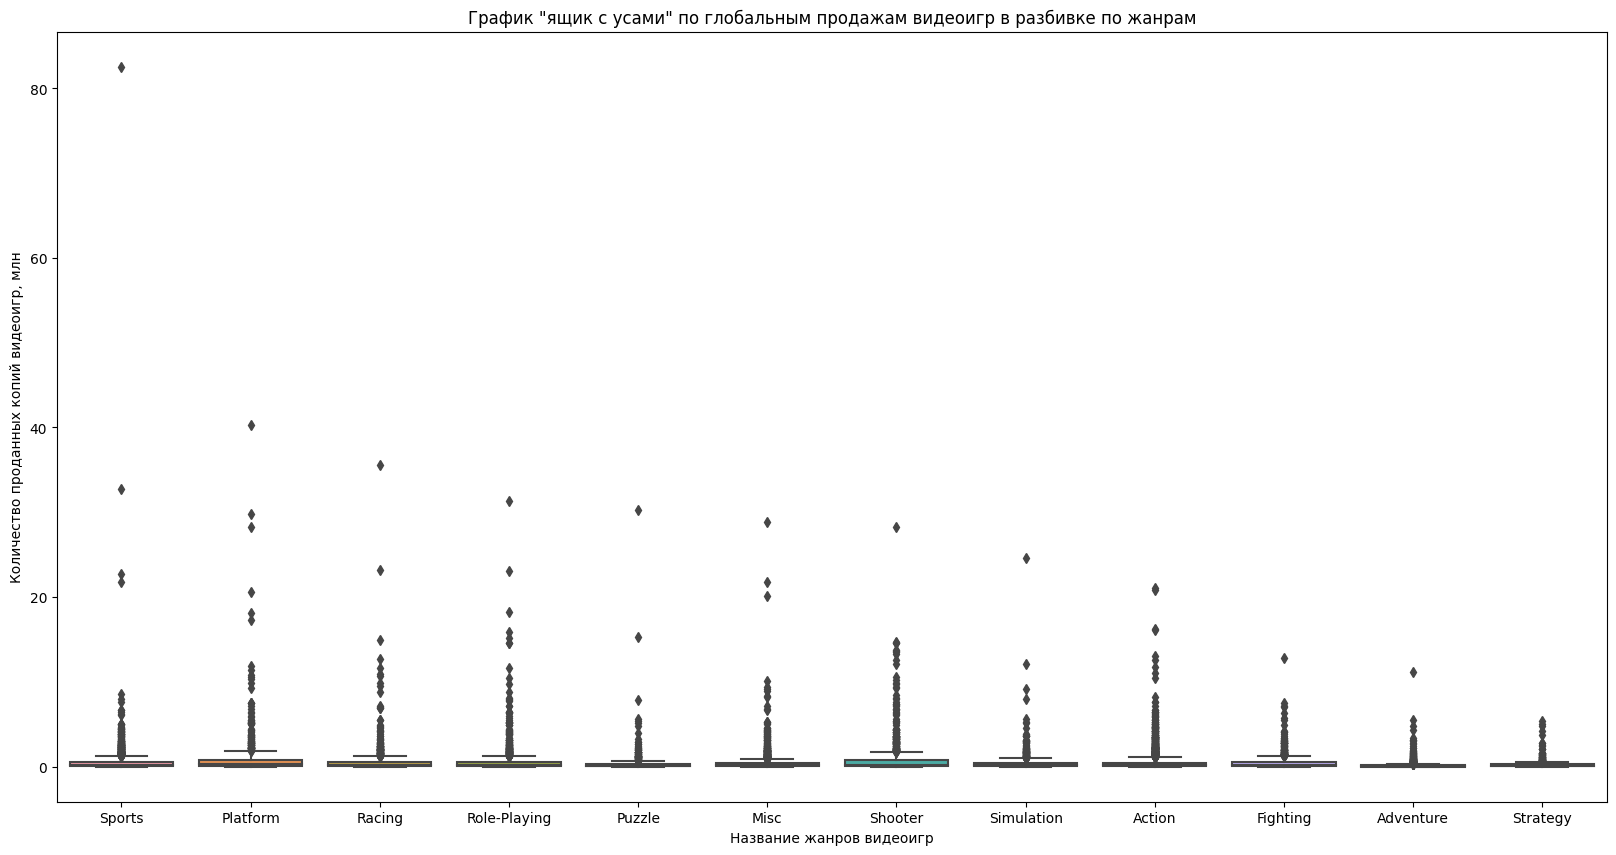

In [146]:
plt.figure(figsize=(20,10))
sns.boxplot(data = gaming_genre, x = 'genre', y = 'total_sales_all_reg')
plt.xlabel('Название жанров видеоигр')
plt.ylabel('Количество проданных копий видеоигр, млн')
plt.title('График "ящик с усами" по глобальным продажам видеоигр в разбивке по жанрам')
plt.show()

Картина начинает проясняться, количество проданных копий видеоигр располагается в диапазоне от 0 до 5 млн. копий. Посмотрим поближе:

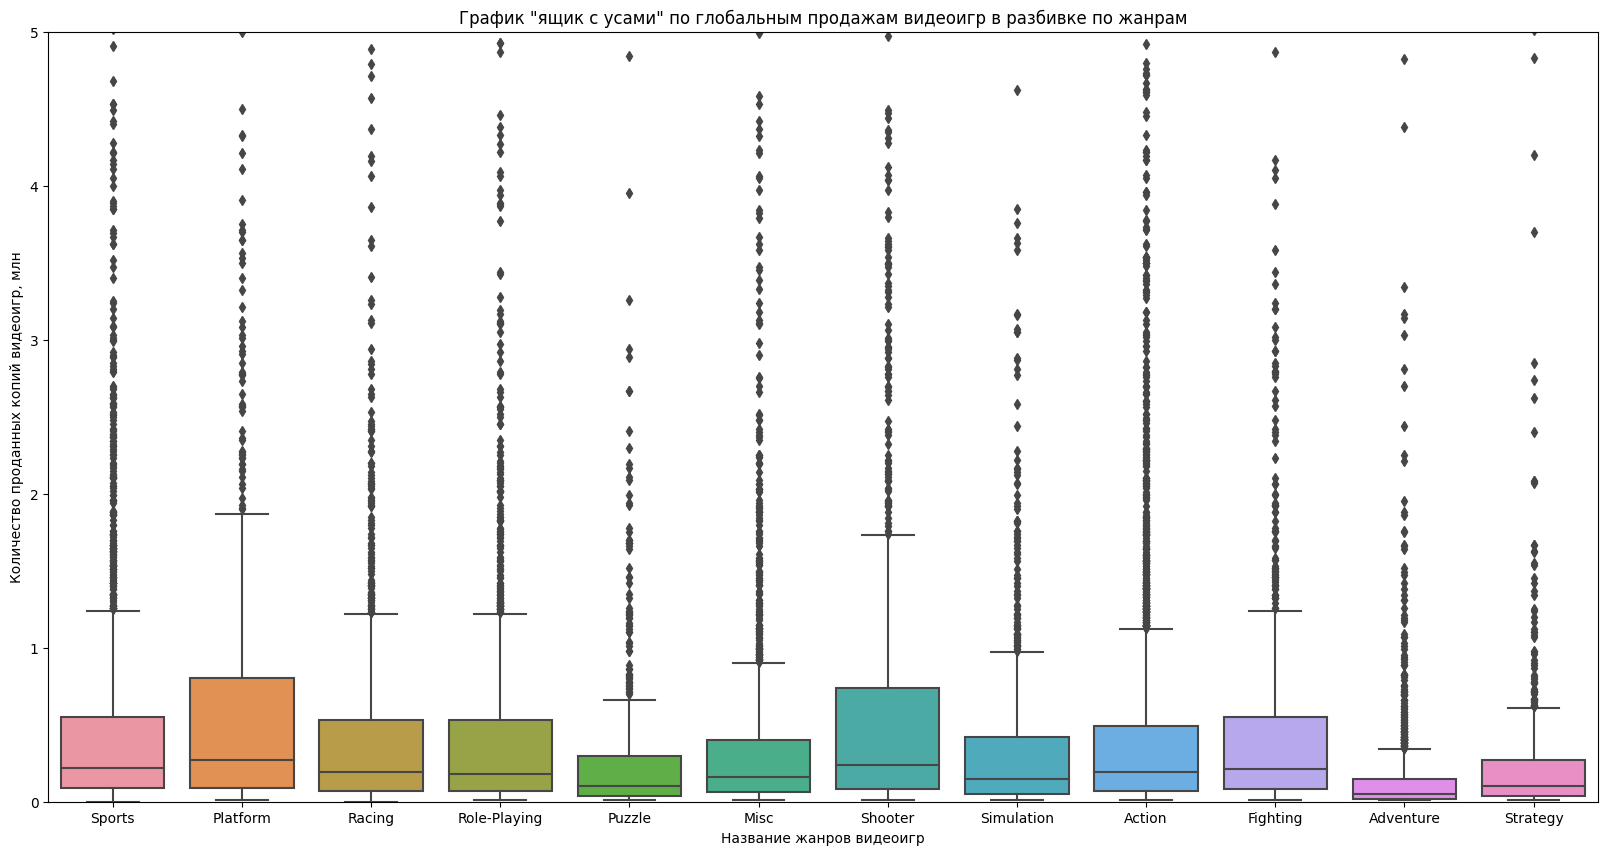

In [147]:
plt.figure(figsize=(20,10))
sns.boxplot(data = gaming_genre.sort_values(by = 'total_sales_all_reg', ascending = False), x = 'genre', y = 'total_sales_all_reg')
plt.xlabel('Название жанров видеоигр')
plt.ylabel('Количество проданных копий видеоигр, млн')
plt.title('График "ящик с усами" по глобальным продажам видеоигр в разбивке по жанрам')
plt.ylim(0, 5)
plt.show()

Посмотрим еще ближе:

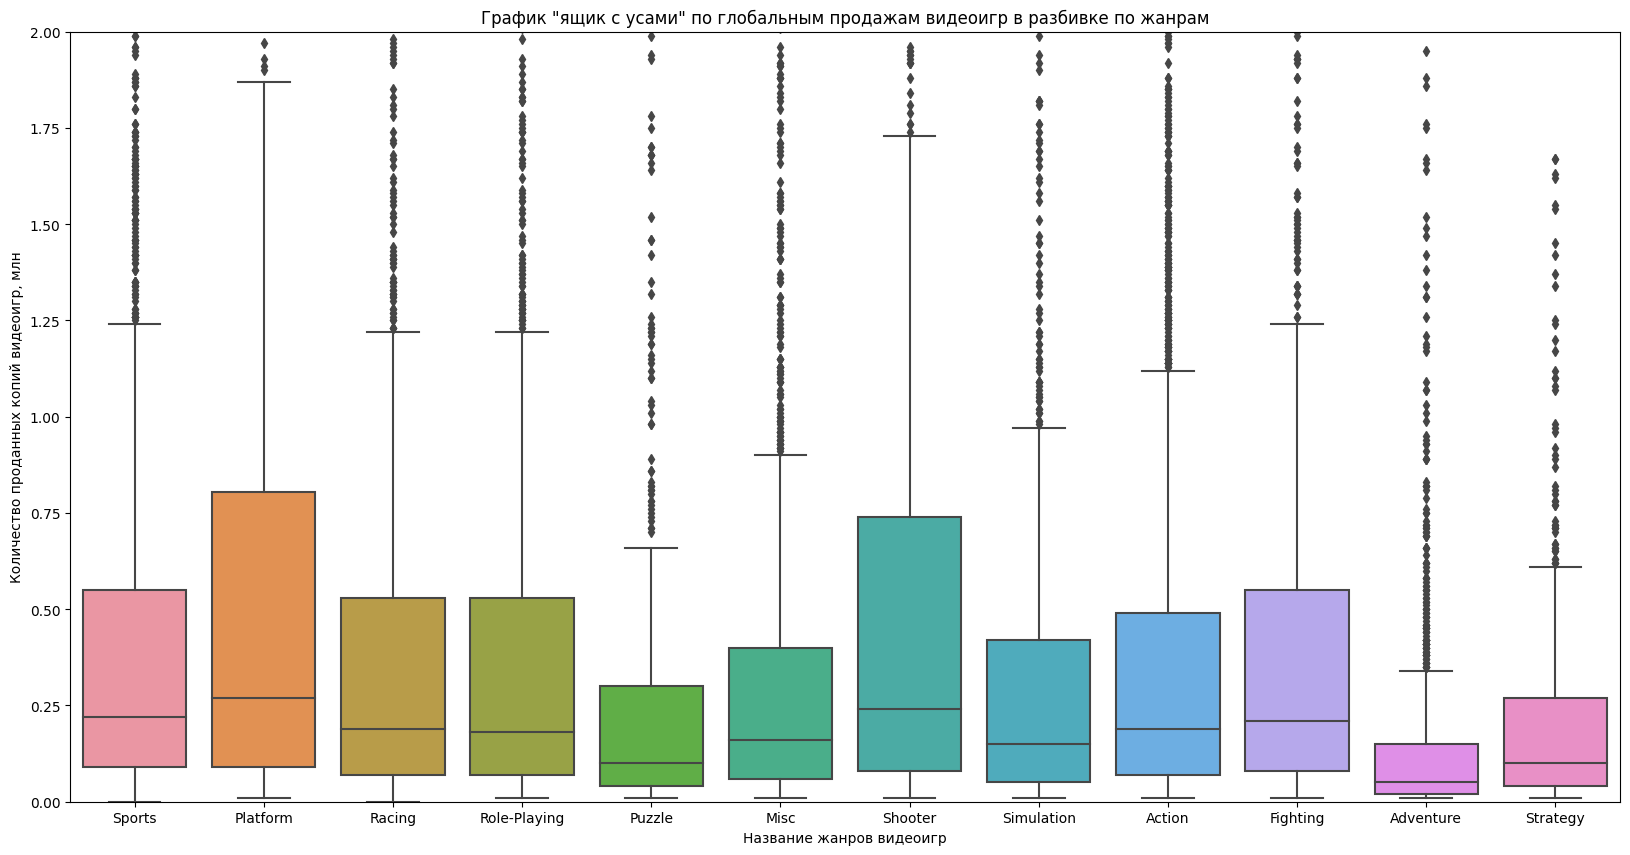

In [148]:
plt.figure(figsize=(20,10))
sns.boxplot(data = gaming_genre.sort_values(by = 'total_sales_all_reg', ascending = False), x = 'genre', y = 'total_sales_all_reg')
plt.xlabel('Название жанров видеоигр')
plt.ylabel('Количество проданных копий видеоигр, млн')
plt.title('График "ящик с усами" по глобальным продажам видеоигр в разбивке по жанрам')
plt.ylim(0, 2)
plt.show()

In [149]:
gaming_genre \
.pivot_table(index='genre', values='total_sales_all_reg', aggfunc=['sum', 'mean', 'median', 'std']) \
.sort_values(('std', 'total_sales_all_reg'), ascending=False)

,sum,mean,median,std
,total_sales_all_reg,total_sales_all_reg,total_sales_all_reg,total_sales_all_reg
genre,,,,
Platform,825.55,0.940262,0.27,2.587816
Sports,1309.67,0.567940,0.22,2.099900
Shooter,1041.36,0.803519,0.24,1.831975
Role-Playing,931.08,0.628683,0.18,1.719155
Racing,723.49,0.590122,0.19,1.670875
Puzzle,239.89,0.421599,0.10,1.577060
Misc,790.29,0.459204,0.16,1.312894
Simulation,387.96,0.452695,0.15,1.196965


*Из приведённых данных можно сделать следующие выводы:*
* По суммарным мировым продажам видиоигр лидирует жанр "Action" - 1716.52 млн. копий, на втором месте "Sports" - 1309.67 млн. копий, на третьем месте "Shooter" - 1041.36 млн. копий. Самыми непопулярными жанрами являются: "Strategy" - 172.57 млн. копий, "Adventure" - 233.33 млн. копий и  "Puzzle - 239.89 млн. копий"
* Медиана располагается почти у всех жанров по разному. Самое большое медианное значение у жанра "Platform" - 270 тыс. копий, на втором месте жанр "Shooter" - 240 тыс. копий, а жанр "Sports" на третьем месте - 220 тыс. копий.
* Среднее значение также располагается у всех жанров по разному. Самое большое среднее значение также у жанра "Platform" - 940 тыс. копий, жанр "Shooter", здесь также на втором месте - 803 тыс. копий, третье место у Role-Playing - 627 тыс. копий.
* Лидерами по выбросам по параметру `std` являются такие жанры как: "Platform", "Shooter", это говорит о том, что у данных жанров были какие-то суперпопулярные игры-бестселлеры. У жанра "Adventure" меньше всего выбросов, это говорит о том, что у данного жанра было мало видеоигр-бестселлеров, данный жанр является более стабильным в этом плане.

**Общий вывод по исследовательскому анализу данных**

* С 2000 года начался резкий рост продаж видеоигр во всем мире, который достиг пика в 2008 году - 670 млн. копий видеоигр. После этого был спад, который продолжался до 2016 года, возможно, связанный с мировым кризисом 2008 года. В Северной Америке и Европе был небольшой рост продаж в период с 2012 по 2014 годы, но кризис 2014 года снизил продажи до уровня близкого к продажам 2000 года. Страны Северной Америки всегда лидировали по продажам видеоигр, на втором месте были страны Европы, а на третьем и четвертом местах была борьба между Японией и остальными странами мира. Исследование интересует только период с 2000 года, так как до этого популярность видеоигр только зарождалась.
* Судя по графикам топ-6 лучших платформ для видеоигр, мы можем увидеть, что новые платформы появляются и исчезают примерно через 10 лет. Обычно пик популярности приходится на середину жизненного цикла платформы. Кроме того, мы видим, что игры, выпущенные на платформах Play Station, Play Station 2 и Nintendo DS, больше не актуальны, так как эти платформы уже не выпускаются. Пик их популярности прошел, поэтому использовать данные по этим платформам нельзя для прогнозирования будущих продаж.
* Лидерами продаж являются Play Station 4, Xbox One и Nintendo 3DS. Персональные компьютеры продолжают оставаться живыми и держатся на "плаву".
* PS4, 3DS, XOne и PC являются самыми популярными игровыми платформами с общим продажами более 5 миллионов копий. PS4 является лидером с продажами в 314,14 миллиона копий, за ним следуют 3DS с 257,81 миллиона копий, PC с 255,76 миллиона копий и XOne с 159,32 миллиона копий. Медианные продажи различаются для каждой платформы, но они находятся ниже 1 миллиона копий. Однако есть много выбросов, указывающих на значительное количество проданных игр, превышающих 1 миллион копий для PC и 3DS, в то время как для PS4 и XOne есть выбросы, превышающие 1,75 миллиона и 1,6 миллиона копий соответственно. PS4 и XOne имеют наибольший диапазон разброса, что указывает на большую нестабильность их продаж по сравнению с PC, который является наиболее стабильной платформой, за ним следует 3DS.
* Между пользовательским рейтингом и глобальными продажами видеоигр есть слабая корреляция (коэффициент корреляции 0,163845), а между рейтингом критиков и глобальными продажами видеоигр есть немного более сильная корреляция (коэффициент корреляции 0,245349). Поэтому лучше полагаться на рейтинг критиков при прогнозировании продаж видеоигр, чем на пользовательский рейтинг.
* Продажи видеоигр больше зависят от оценок критиков, а не пользователей.
* "Экшн" - самый популярный мировой жанр видеоигр - 1716.52 млн. копий. Самыми непопулярный мировой жанр видеоигр - "Strategy" - 172.57 млн. копий.

# 4. Портрет пользователя каждого региона



Так как нас интересует прогноз на 2017 год, поэтому логично посмотреть данные за 2016, то есть за год до этого. Но так как за 2016 год данные у нас неполные, то задам выборку с 2015 года включительно.  

In [150]:
top_platf_2016 = df[(df['year_of_release'] >= 2015)]
top_platf_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_all_reg
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39


**Задание 15. Определим портрет пользователя самого популярного рынка продаж видеоигр - Северной Америки**

Top-5 наиболее популярных платформ в Северной Америке

In [151]:
# Создам сводную таблицу популярных игровых платформ Северной Америки за 2015-2016 годы:
top_platf_2016_na = top_platf_2016.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
top_platf_2016_na.head()

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


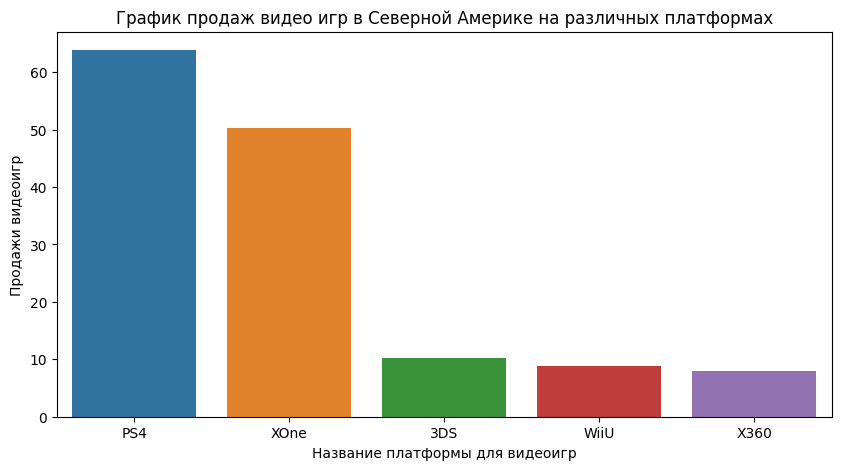

In [152]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_platf_2016_na.index, y = top_platf_2016_na['na_sales'])
plt.title("График продаж видео игр в Северной Америке на различных платформах")
plt.xlabel("Название платформы для видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Top-5 наиболее популярных жанров видеоигр в Северной Америке

In [153]:
# Создам сводную таблицу популярных жанров видеоигр Северной Америки за 2015-2016 годы:
top_genre_2016_na = top_platf_2016.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
top_genre_2016_na.head()

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


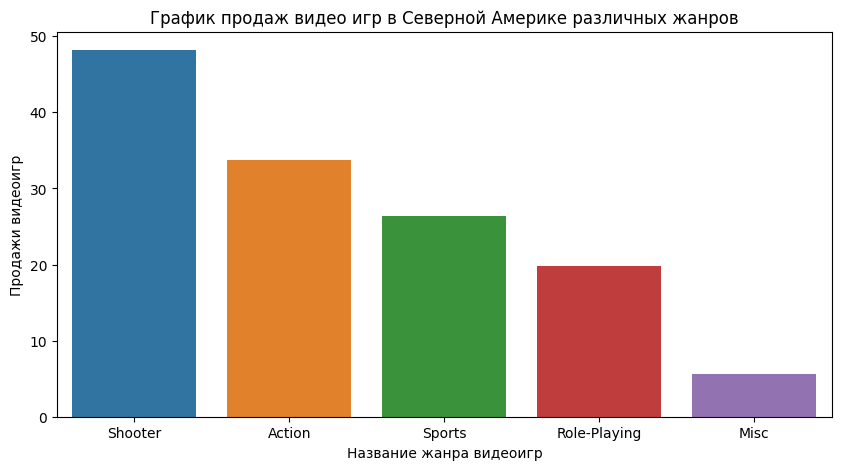

In [154]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_genre_2016_na.index, y = top_genre_2016_na['na_sales'])
plt.title("График продаж видео игр в Северной Америке различных жанров")
plt.xlabel("Название жанра видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Top рейтингов видеоигр в Северной Америке

In [155]:
# Создам сводную таблицу рейтингов видеоигр Северной Америки за 2015-2016 годы:
top_rating_2016_na = top_platf_2016.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()
top_rating_2016_na.head()

,na_sales
rating,
M,47.03
E,26.59
T,22.86
E10+,17.87


*Так как в топе нашего исследования представлены только 4 вида рейтинга ESRB (Совет по рейтингу развлекательного программного обеспечения), эти возрастные рейтинги помогают потребителям решить, подходит ли игра для предполагаемого пользователя, и гарантируют, что дети не увидят неприемлемый контент.их мы и распишем подробнее:*

- M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.
- Е - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
- T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
- E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

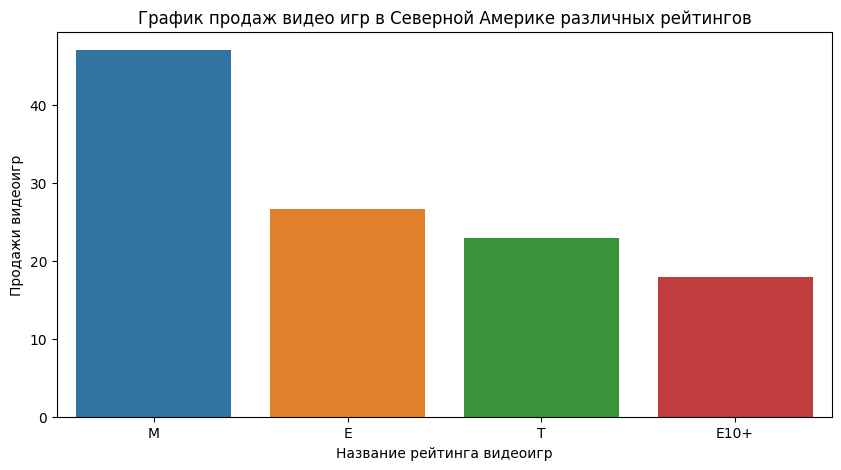

In [156]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_rating_2016_na.index, y = top_rating_2016_na['na_sales'])
plt.title("График продаж видео игр в Северной Америке различных рейтингов")
plt.xlabel("Название рейтинга видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Проведем промежуточный итог для стран Северной Америки:
* Наиболее популярными платформами видеоиг на рынке Северной Америки являются Play Station 4 и Xbox One, они лидируют с большим отрывом. На 3 месте - Nintendo 3DS, на 4 - Nintendo WiiU и на 5 - Xbox 360;
* Наиболее популярными жанрами видеоигр являются: 1 место - "Шутер", 2 место - "Экшн", 3 - "Спортивные игры", 4 - "Ролевые игры", 5 - "Misc";
* Рейтинги видеоигр: 1 - М, 2 - E, 3 - T, 4 - E10+

*Здесь ещё можно сделать такие наблюдения:*
- Лидерство рейтинга М в Северной Америке можно объяснить желанием пользователей старше 17 лет погрузиться в мир видеоигр с головой, так как этот контенгент ползователей является трудоспособным и соответственно деньги на не самую дешевую и популярную платформу - Play Station 4 у них есть;
- Так как в Северной Америке есть свои игровые платформы, то здесь представлены две приставки от компанни Майкрософт- это Xbox One и Xbox 360, но тем не менее мировое лидерство Play Station никто не отменял;
- Самый популярный жанр "Щутер" (причем с большим отрывом, чем на Европейском рынке) с учетом того, что 1 место занимают игры с рейтингом M (пользователи старше 17 лет) и 2 место занимают игры с рейтингом Е (подходит для всех возрастных категорий) может сказать нам о том, что пользователи данных игр являются давольно таки "воинственными". По факту США является "мировым жандармом" и ни один крупнейший как мировой так и локальный конфликт не проходил без участия этой страны;
- Присутствие игровой консоли Nintendo WiiU тоже занимает свою нишу на рынке Северной Америки, при чем опережает Xbox 360, а это стационарная приставка.

**Задание 16. Определим портрет пользователя второго по пулярности рынка продаж видеоигр - Европы**

Top-5 наиболее популярных платформ в Европе

In [157]:
top_platf_2016_eu = top_platf_2016.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
top_platf_2016_eu.head()

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


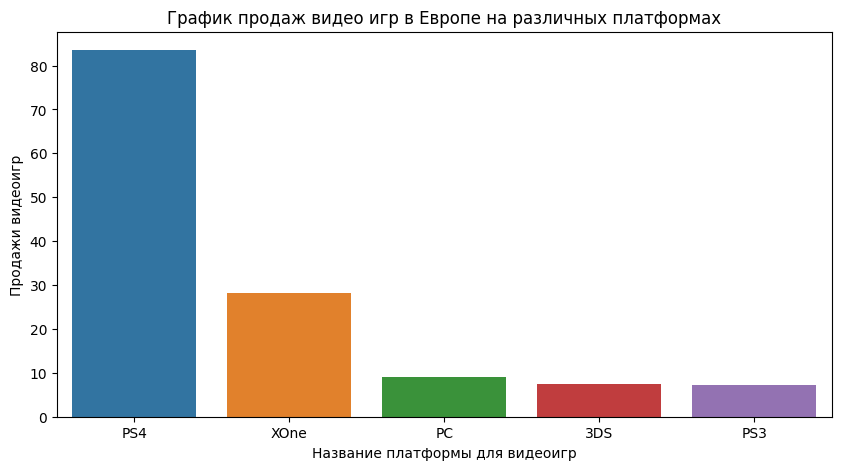

In [158]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_platf_2016_eu.index, y = top_platf_2016_eu['eu_sales'])
plt.title("График продаж видео игр в Европе на различных платформах")
plt.xlabel("Название платформы для видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Top-5 наиболее популярных жанров видеоигр в Европе

In [159]:
# Создам сводную таблицу популярных жанров видеоигр Европы за 2015-2016 годы:
top_genre_2016_eu = top_platf_2016.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
top_genre_2016_eu.head()

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


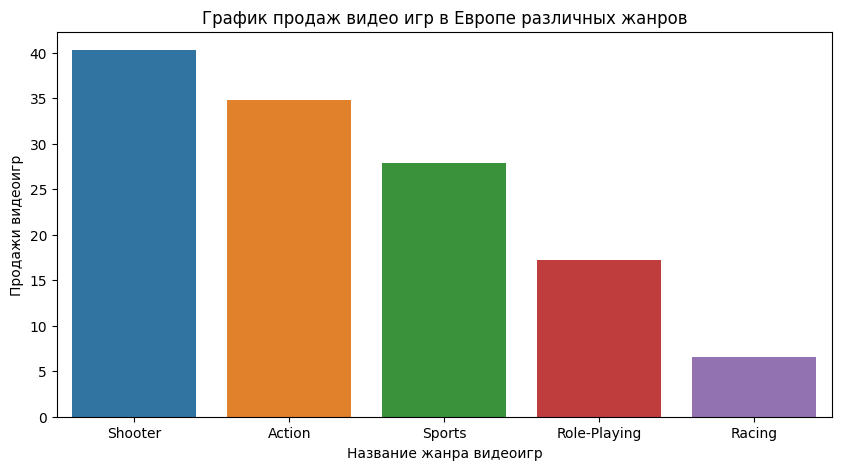

In [160]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_genre_2016_eu.index, y = top_genre_2016_eu['eu_sales'])
plt.title("График продаж видео игр в Европе различных жанров")
plt.xlabel("Название жанра видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Top рейтингов видеоигр в Европе

In [161]:
# Создам сводную таблицу рейтингов видеоигр Европы за 2015-2016 годы:
top_rating_2016_eu = top_platf_2016.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()
top_rating_2016_eu.head()

,eu_sales
rating,
M,45.54
E,34.83
T,20.32
E10+,11.54


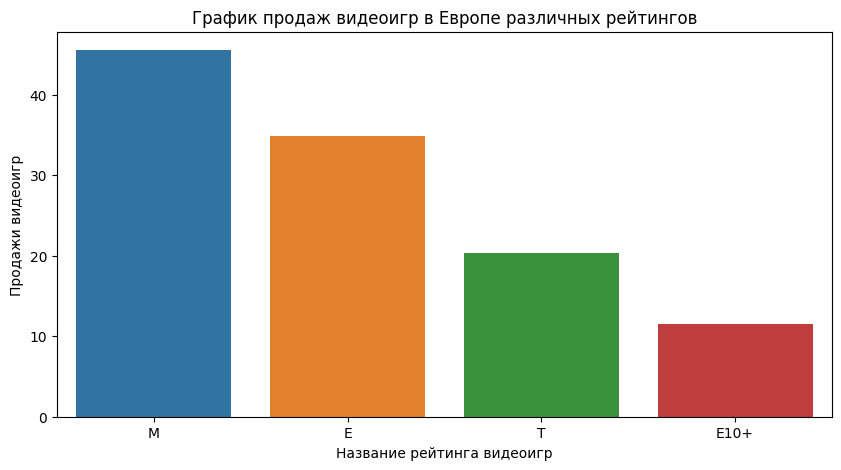

In [162]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_rating_2016_eu.index, y = top_rating_2016_eu['eu_sales'])
plt.title("График продаж видеоигр в Европе различных рейтингов")
plt.xlabel("Название рейтинга видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Проведем промежуточный итог для стран Европы:
* Наиболее популярными платформами видеоиг на рынке Европы являются также Play Station 4 и Xbox One, только Play Station 4 лидирует более чем с трехратным отрывом от ближайшего конкурента Xbox One. 3, 4, 5 места занимают PC,  Nintendo 3DS и Play Station 3 соответственно;
* Наиболее популярными жанрами видеоигр являются:  1 место - "Шутер", 2 место - "Экшн", 3 - "Спортивные игры", 4 - "Ролевые игры". То есть все те же самые жанры, что и на Северо-Американском рынке видеоигр, при этом игр жанра "Шутер" продано на 7 млн. копий меньше, чем в Северной Америке. 5 место занимает жанр - "Гоночные игры";
* Распределение рейтинга видеоигр такое же как и в Северной Америке.

*Здесь ещё можно сделать такие наблюдения:*
- Из представленных консолей только одна не стационарная;
- Лидерство рейтинга М в Европе можно объяснить желанием пользователей старше 17 лет погрузиться в мир видеоигр с головой, так как этот контенгент является трудоспособным и соответственно деньги на не самую дешевую и популярную платформу - Play Station 4 у них есть;
- Так как Европа находится по факту между Америкой и Азией (в лице Японии) и не имеет своих игровых платформ, то на этом рынке представлены как консоли из Северной Америки - Xbox One, так и Азии/Японии - Nintendo 3DS и Play Station;
- Самый популярный жанр "Щутер" с учетом того, что 1 место занимают игры с рейтингом M (пользователи старше 17 лет) и 2 место занимают игры с рейтингом Е(подходит для всех возрастных категорий) может сказать нам о том, что пользователи данных игр являются давольно таки "воинственными". Это можно объяснить тем, что страны Европы входят в крупнейший военный блок - NATO, который за последние 70 лет учавствовал практически во всех крупнейших локальных военных конфликтах.

**Задание 17. Определим портрет пользователя видеоигр - Японии**

Top-5 наиболее популярных платформ Японии

In [163]:
top_platf_2016_jp = top_platf_2016.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
top_platf_2016_jp.head()

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


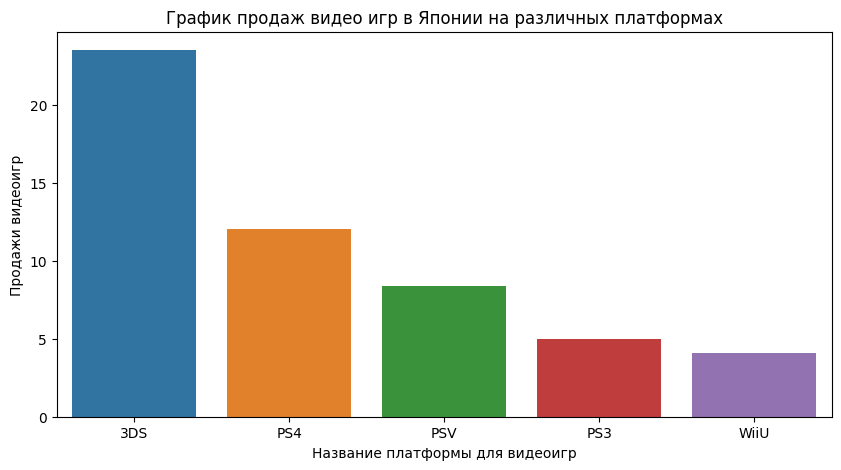

In [164]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_platf_2016_jp.index, y = top_platf_2016_jp['jp_sales'])
plt.title("График продаж видео игр в Японии на различных платформах")
plt.xlabel("Название платформы для видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Top-5 наиболее популярных жанров видеоигр в Японии

In [165]:
# Создам сводную таблицу популярных жанров видеоигр Японии за 2015-2016 годы:
top_genre_2016_jp = top_platf_2016.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
top_genre_2016_jp.head()

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


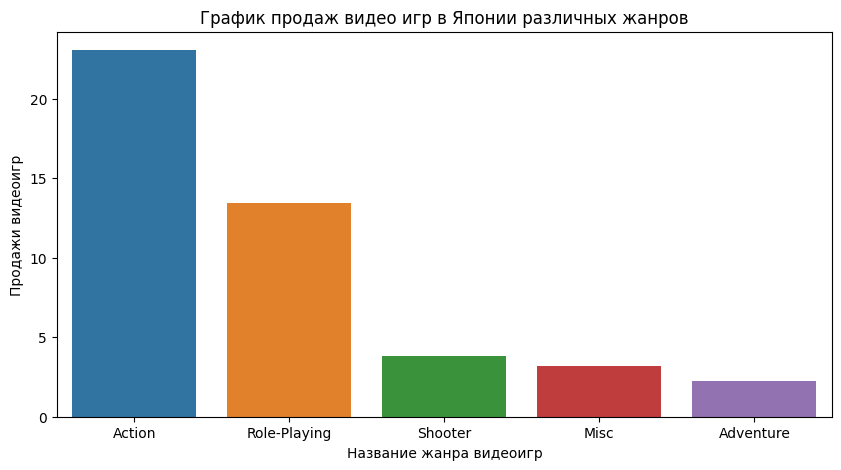

In [166]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_genre_2016_jp.index, y = top_genre_2016_jp['jp_sales'])
plt.title("График продаж видео игр в Японии различных жанров")
plt.xlabel("Название жанра видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Top рейтингов видеоигр в Японии

In [167]:
# Создам сводную таблицу рейтингов видеоигр Японии за 2015-2016 годы:
top_rating_2016_jp = top_platf_2016.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()
top_rating_2016_jp.head()

,jp_sales
rating,
T,7.70
E,5.25
M,4.29
E10+,3.27


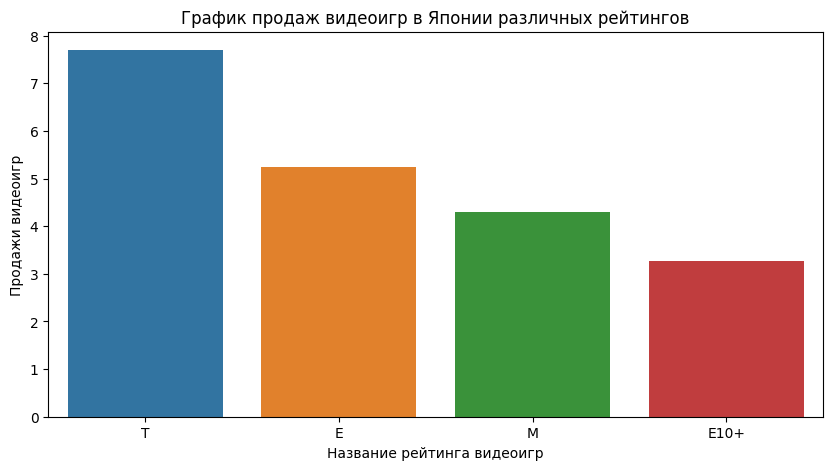

In [168]:
# Визуализируем полученные данные
plt.figure(figsize=(10,5))
sns.barplot(x = top_rating_2016_jp.index, y = top_rating_2016_jp['jp_sales'])
plt.title("График продаж видеоигр в Японии различных рейтингов")
plt.xlabel("Название рейтинга видеоигр")
plt.ylabel("Продажи видеоигр")
plt.show()

Проведем промежуточный итог для Японии:

- Наиболее популярными платформами видеоигр на рынке Японии являются: 1 место - Nintendo 3DS, 2 место - Play Station 4, 3 место - PlayStation Vita, 4 место - Play Station 3, 5 место - Nintendo WiiU;

- Наиболее популярными жанрами видеоигр являются: 1 место - "Экшн", 2 место - "Ролевые игры", 3 - "Шутер", 4 - "Misc". 5 место занимает жанр - "Приключенческие игры";

- Рейтинг видеоигр: 1 - T, 2 - E, 3 - M, 4 - E10+

*Здесь ещё можно сделать такие наблюдения:*
- в топе присутствуют портативные консоли и их здесь 3 штуки, это больше, чем на других рынках. Япония славится своей электроникой, возможно лучшей в мире, поэтому японцы поддерживают отечественного производителя и покупают лучшее;
- все консоли являются японскими, нет ни одной консоли, которая была бы произведена в других странах;
- наибольшим контенгентом лиц играющих в игры являются лица старше 13 лет, возможно это обстоятельство и объясняет популярность портативных консолей;
- наибольшим успехом в Японии пользуются игры жанра "Экшн", в отличии от стран Европы и Северной Америк, где первое место у жанра "Стрелялок/Шутер". Жанр "Шутер" в Японии значительно уступает первым двум. Возможно это объясняется стремлением японцев к гармонии и балансу, а также очень активным образом жизни и трудоголизмом.

*Подведем итог на основании приведённых данных:*

- Популярность тех или иных игровых платформ зависит от региона продаж, но безусловным лидером среди стационарных платформ является Play Station 4 вне зависимости от регионов, среди портативных - Nintendo 3DS. На втором месте по популярности игровых платформ находится XOne. Третье место в Европе занимают персональные компьютеры, а в Северной Америке - портативная приставка Nintendo 3DS.

- Популярность жанра видеоигр также определяется регионом продаж, а также менталитетом ее пользователей. Распределение популярности видеоигр по жанрам для рынков Северной Америки и Европы одинаково: 1 место - "Шутер", 2 место - "Экшн", 3 - "Спортивные игры", 4 - "Ролевые игры". Для Японии: 1 место - "Экшн", 2 место - "Ролевые игры", 3 - "Шутер", 4 - "Misc". 5 место занимает жанр - "Приключенческие игры"

- Распределние продаж видеоигр в зависимости от рейтинга для рынка Европы и Северной Америки одинаково: 1 место - категория М рейтинга ESRB (подходит для лиц старше 17 лет), 2 место - категория E рейтинга ESRB (подходит для всех возрастных категорий) и 3 место - категория Т рейтинга ESRB (подходит для лиц старше 13 лет). Распределние продаж видеоигр в зависимости от рейтинга для рынка Японии с точностью до наоборот, категории рейтинга ESRB следуют в следующем порядке: 1 место - категория Т рейтинга ESRB (подходит для лиц старше 13 лет), 2 место - категория E рейтинга ESRB (подходит для всех возрастных категорий) и  3 место - категория М рейтинга ESRB (подходит для лиц старше 17 лет). Изначально рейтинг ESRB разрабатывался для рецензирования видеоигр для рынков стран Европы и Северной Америки, поэтому здесь прослеживается зависимость между рейтингом видеоигр и продажами. Для Японии применять данный рейтинг некорректно. В Японии есть своё агентство по выдаче рейтинга видеоигр - Computer Entertainment Rating Organization (CERO).

# 5. Проверка гипотез

Для проверки наших гипотез возьмем даннные датафрейма за 2015 - 2016 годы. Почему берем данные именно за 2015 - 2016 годы:
- во-первых, данные за 2016 год неполные;
- во-вторых, популярность платформ в зависимости от годов релизов платформ быстро изменяется, поэтому некорректно брать данные за бОльший период.

Прежде чем приступить к проверке гипотез вспомним, что нужно прежде, чем применить t-test (именно t-test нам и нужен для проверки данных гипотез):

- 1. Генеральные совокупности не должны зависеть друг от друга. Наши генеральные совокупности независимы;
- 2. Выборочные средние должны быть нормально распределены. Так как размеры выборок в нашем исследовании значительно превышают 30 значений и благодаря ЦПТ (центральной предельной теореме) выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупнности. Именно поэтому будем считать, что выборочные средние в нашем исследовании нормально распределены.
- 3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Посчитаем дисперсии по интересующим нас параметрам, если они не будет равны, то укажем `equal_var = False` при применении t-test`a.

**Задание 18. Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**
```
H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = cреднему пользовательскому рейтингу (user_score) платформы PC
H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ cреднему пользовательскому рейтингу (user_score) платформы PC
alpha = 0.05
```

In [169]:
user_score_rating_XOne = df[(df['platform'] == 'XOne') & (df['user_score'] > 0) & (df['year_of_release'] >= 2015)]['user_score']

In [170]:
user_score_rating_PC = df[(df['platform'] == 'PC') & (df['user_score'] > 0) & (df['year_of_release'] >= 2015)]['user_score']

Посчитаем дисперсии по интересующим нас параметрам, если они не будет равны, то укажем `equal_var = False` при применении t-test`a.

In [171]:
user_score_rating_XOne.var()

2.125792011019284

In [172]:
user_score_rating_PC.var()

3.110950946643718

Удалим пропущенные значения в столбце `user_score` методом dropna():

In [173]:
results = st.ttest_ind(user_score_rating_XOne.dropna(), user_score_rating_PC.dropna(), equal_var = False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


*Вывод:*

Не получилось отвергнуть нулевую гипотезу о том, что средний пользовательский рейтинг платформы Xbox One равен cреднему пользовательскому рейтингу платформы PC. Значение p-value равное почти 0.3 показывает: вероятность получить такое или большее различие равна почти 30%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами игровых платформ Xbox One и PC. То есть, на основании данного теста нельзя сделать вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

**Задание 19. Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = cреднему пользовательскому рейтингу (user_score) жанра Sports
H_1: Средний пользовательский рейтинг (user_score) жанра Action ≠ cреднему пользовательскому рейтингу (user_score) жанра Sports
alpha = 0.05
```

In [174]:
user_score_rating_Action = df[(df['genre'] == 'Action') & (df['user_score'] > 0) & (df['year_of_release'] >= 2015)]['user_score']

In [175]:
user_score_rating_Sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0) & (df['year_of_release'] >= 2015)]['user_score']

Посчитаем дисперсии по интересующим нас параметрам, если они не будет равны, то укажем `equal_var = False` при применении t-test`a.

In [176]:
user_score_rating_Action.var()

1.81305591537133

In [177]:
user_score_rating_Sports.var()

3.8724676302318572

Удалим пропущенные значения в столбце user_score методом dropna():

In [178]:
results = st.ttest_ind(user_score_rating_Action.dropna(), user_score_rating_Sports.dropna(), equal_var = False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


*Вывод:*

Отвергаем нулевую гипотезу о том, что средний пользовательский рейтинг жанра Action **равен** cреднему пользовательскому рейтингу жанра Sports. Значение p-value практически стремится к 0, это значение показывает, что нулевая гипотеза должна быть отвергнута в пользу альтернативной гипотезы о **не равенстве** средних пользовательских рейтингов жанров Action и Sports. То есть, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports **не равны** друг другу.

*Вывод по проверенным гипотезам:*
* На основании проведенного теста в первой гипотезе можно сделать вывод, что средние пользовательские рейтинги платформы Xbox One и платформы PC равны, так как не удалось опровергнуть данную гипотезу;
* Тест проведенный для проверки второй гипотезы наоборот позволяет сделать нам вывод, что средние пользовательские рейтинги жанров Action и Sports **не равны** друг другу, так как удалось отвергнуть нулевую гипотезу.

# 6. Общий вывод

* В ходе проекта была проведена работа по обработке пропусков в датафрейме. Большое количество пропусков в столбцах critic_score, user_score, rating скорее всего связано с непопулярностью данных видеоигр у пользователей либо  на момент существования видеоигр еще не существовало рейтинговых агенств. Я решил оставить пропуски без изменения, чтобы избежать искажения результатов исследования. В столбце user_score я заменил значения tbd на -1, чтобы указать, что игры ещё не анонсированы.
* На основании исследовательского анализа данных удалось выявить следующее: c 2000 года начался резкий рост продаж видеоигр во всем мире, cтраны Северной Америки всегда лидировали по продажам видеоигр, на втором месте были страны Европы, а на третьем и четвертом местах была борьба между Японией и остальными странами мира. До 2000 года популярность видеоигр только зарождалась.
* Самыми популярными играми - топ-6 по суммарным продажам начиная с 2000 годов являлись: Play Station 2, Xbox360, Play Station 3, Nintendo Wii, Nintendo DS и Play Station.
* В первом десятилетии 2000 годов начался активно развиваться рынок смартфонов, а в 2008 году случился крупнейший экономический кризис последнего времени возможно каждый из этих факторов повлиял на последующий спад в развитии рынка видеоигр. Было бы интересно проанализировать долю игр для смартфонов от общей доли видеоигр, включая портативные консоли и стационарные консоли.
* В ходе исследования удалось установить, что новые платформы появляются и исчезают примерно через 10 лет. Обычно пик популярности приходится на середину жизненного цикла игровой платформы. Кроме того, мы видим, что игры, выпущенные на платформах Play Station, Play Station 2 и Nintendo DS, больше не актуальны, так как эти платформы уже не выпускаются. Пик их популярности прошел, поэтому использовать данные по этим платформам нельзя для прогнозирования будущих продаж.
* Так как нас в проекте интересует прогноз на 2017 год, то я брал в учет платформы, год выпуска которых начинается с 2012 года. И добавил условие, что суммарные продажи видеоигр на этих платформах составляют более 5 млн. копий, то есть эти платформы еще не "умерли". Определились потенциально прибыльные игровые платформы: Play station 4 признаётся мировым лидером продаж видеоигр с результатом 70 млн. копий, следом идёт Xbox One - 27 млн. копий, третье место занимает портативная игровая консоль Nintendo 3DS с результатом 8 млн. копий, четвёртое место за персональными компьютерами - около 7 млн копий.
* Продажи видеоигр больше зависят от оценок критиков, а не от оценок пользователей.
* "Экшн" - самый популярный мировой жанр видеоигр - 1716.52 млн. копий. Самыми непопулярный мировой жанр видеоигр - "Strategy" - 172.57 млн. копий.
* Популярность игровых платформ и жанров видеоигр зависит от региона продаж
* Безусловным лидером среди стационарных платформ является Play Station 4 вне зависимости от регионов, среди портативных - Nintendo 3DS. На втором месте по популярности игровых платформ находится XOne. Третье место в Европе занимают персональные компьютеры, а в Северной Америке - портативная приставка Nintendo 3DS.
*  Распределение популярности видеоигр по жанрам для рынков Северной Америки и Европы одинаково: 1 место - "Шутер", 2 место - "Экшн", 3 - "Спортивные игры", 4 - "Ролевые игры".
* В тройку самых популярных жанров видеоигр Японии вошли: 1 место - "Экшн", 2 место - "Ролевые игры", 3 - "Шутер"
* На основании популярности жанров видео игр можно сделать прогноз на будущий 2017 год. Современных пользователей меньше всего интереует сюжетная линия игры, большим спросом пользуются игры с незамысловатым сюжетом, а еще лучше чтобы было как можно больше подсказок по ходу игры и больше видов различчного оружия, которым можно уничтожить противника. Это скорее всего веяния современного мира, где постоянно происходять военные конфликты, ненавязчивая пропоганда криминального мира в современных фильмах, всё это задает тренд на развитие игр в заданном ключе. Интересно было бы провести анализ данных более современных видеоигр, начиная с 2017 года.
* Рейтинг ESRB разрабатывался для рецензирования видеоигр для рынка стран Северной Америки (США, Канада и Мексика), поэтому здесь прослеживается зависимость между рейтингом видеоигр и продажами для рынков Северной Америки и Европы. Для Японии данный рейтинг применять некорректно.
* По итогам проекта был выявлен общий тренд на уменьшение интереса у пользователей к видеоиграм, возможно это связано с ростом интереса у пользователей к играм на смартфонах, так как смартфон всегда рядом и в любое время его можно использовать для прохождения очередного уровня в какой-либо игре. К тому же в последние несколько лет начали появляться "игровы смартфоны" с мощным железом и с большими диагоналями экранов, было бы так же интересно посмотреть влияние таких смартфонов на общую долю портативных консолей. В ходе проекта мы также убедились, что доля портативных консолей также снижается.
* В первой гипотезе средние пользовательские рейтинги платформ Xbox One и PC оказались равны, так как опровергнуть данную гипотезу не удалось.
* Вторая гипотеза показала, что средние пользовательские рейтинги жанров Action и Sports не равны друг другу, так как нулевая гипотеза была отвергнута.

